In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importaciones

In [ ]:
# Tratamiento de datos
import re
import io
import json
import lxml
import requests
import math
import numpy as np
import pandas as pd

# Gráficos
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter

from collections import defaultdict # Para generar un diccionario nuevo de valores
from bs4 import BeautifulSoup
import matplotlib.pyplot as plot
from bokeh.plotting import figure
from bokeh.io import show
import numpy as np
# Preprocesado y modelado
import lightgbm as lgb
import multiprocessing

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.special import entr # Entropía de Shannon
from scipy.stats import multivariate_normal # Modelo de distribución gaussiana multivariable
from scipy.stats import median_abs_deviation # MAD
from scipy.stats import iqr # Interquartile range

from sklearn import svm, metrics
from sklearn.svm import SVC

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales
from sklearn.preprocessing import OneHotEncoder # Librería donde está el método One-Hot Encoder
from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA # Análisis de Componentes Principales
from sklearn.decomposition import KernelPCA # Kernel PCA
from sklearn.decomposition import SparsePCA # PCA esparcido
from sklearn.decomposition import MiniBatchSparsePCA # Mini Batch PCA esparcido
from sklearn.decomposition import IncrementalPCA # PCA incremental
from sklearn.decomposition import FastICA # Análisis de Componentes Independientes

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.model_selection import GridSearchCV # Búsqueda de hiperparametros
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

from sklearn.linear_model import RANSACRegressor, LogisticRegression, LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score, median_absolute_error, f1_score
from sklearn.metrics import roc_auc_score, precision_score, roc_curve, confusion_matrix, classification_report, make_scorer, accuracy_score

from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier ,RandomForestClassifier ,GradientBoostingClassifier,HistGradientBoostingClassifier

from sklearn.datasets import make_multilabel_classification , load_iris

from sklearn.naive_bayes import GaussianNB, BernoulliNB ,MultinomialNB

from sklearn.covariance import EllipticEnvelope # Estimación de Covarianza
from sklearn.utils.extmath import safe_sparse_dot # Producto punto entre matrices esparcidos para SparsePCA.
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import GaussianRandomProjection
from sklearn.multioutput import ClassifierChain
from sklearn.feature_selection import RFE
from sklearn.manifold import TSNE
from sklearn.experimental import enable_hist_gradient_boosting

/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Funciones

In [ ]:
# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
def filtrar_campo(df_filtrar_campo,col,val):
 '''Filtra un DF por campo y valor dado'''
 return df_filtrar_campo[df_filtrar_campo[col]==val]  

In [ ]:
def filtrar_n_ultimos_juegos(df,n,fecha,columnas_a_filtrar,valores_a_filtrar):
  '''ordena por fecha un df y lo filtra hasta una fecha dada segun lista de campos y valores dados, si hay un filtro por valores excluyentes no se to ejecuta'''
  df_retorna=df.copy()
  df_retorna=df_retorna[df_retorna['Historia.Fecha']<fecha]  
  for columna,valor in zip(columnas_a_filtrar,valores_a_filtrar):
    df_retorna=filtrar_campo(df_retorna,columna,valor)
  df_retorna.sort_values(by='Historia.Fecha', ascending = False,inplace=True)
  return df_retorna[:n]

In [ ]:
def traer_informacion_historica(df_historico,cantidad_juegos,fecha_proximo_juego,campos_a_filtrar,valores_a_filtrar,prefijo):
  #df_ultimos_juegos=filtrar_n_ultimos_juegos(dataset_historia,3,'2023-02-19',['Historia.id_Equipo_Analizado'],['94'])
  df_ultimos_juegos=filtrar_n_ultimos_juegos(df_historico,cantidad_juegos,fecha_proximo_juego,campos_a_filtrar,valores_a_filtrar)
  df_dinamizado=dinamizar_columnas(df_ultimos_juegos,prefijo)
  return df_dinamizado


In [ ]:
def dinamizar_columnas(df,prefijo):
  ''' recibe un DF y lo convierte en un df de una sola fila'''
  lista_campos=[]
  lista_valores=[]
  for col in df.iloc[: , :-1]:
    lista=list(df[col])
    for fil in range(len(lista)):
      lista_campos.append(f"{prefijo}.{col} N-{fil+1}")
      lista_valores.append(lista[fil])
  df_generado=pd.DataFrame([lista_valores],columns=lista_campos)
  return  df_generado  

In [ ]:
def error_ica(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida

In [ ]:
def error_kernelpca(datos_OR, datos_Reconstruidos):
  perdida = np.sum((np.array(datos_OR) - np.array(datos_Reconstruidos))**2, axis = 1)
  perdida = pd.Series(data = perdida, index = datos_OR.index)
  perdida = (perdida - np.min(perdida))/(np.max(perdida) - np.min(perdida))
  return perdida


# Construcción de la base de datos

In [ ]:
#Definición de parámetros

partidos_historicos=7

equipos=['Verona',
'Roma',
'Lazio',
'Bologna',
'Juventus',
'Udinese',
'Sampdoria',
'Sassuolo',
'Napoli',
'Inter',
'Atalanta',
'Empoli',
'Fiorentina',
'AC Milan',
'Torino',
'Lecce',
'Spezia',
'Salernitana',
'Monza',
'Cremonese',
'Genoa',
'Cagliari',
'Venezia',
'Crotone',
'Benevento',
'Parma Calcio 1913']

id_equipos=[
'94', 
'95', 
'96', 
'97', 
'98', 
'99', 
'102', 
'104', 
'105', 
'106', 
'107', 
'108', 
'110', 
'111', 
'113', 
'243', 
'260', 
'264', 
'271', 
'272',
'101',
'116',
'265',
'115',
'222',
'230'	]

In [ ]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

Partidos de temporada actual, jugados y pendientes

In [ ]:
#Construir el dataset
dataset_inicial=pd.DataFrame([])
for _ in equipos: 
  base_url_game='https://understat.com/team/' #Consultar la API
  team = _ #str(input('please enter the team name:'))
  temporadas=['2022','2021','2020','2019','2018','2017','2016','2015']
  for season in temporadas:
    url_game = base_url_game + team +"/"+season
    res_game = requests.get(url_game)
    soup_game = BeautifulSoup(res_game.content,'lxml')
    scripts_game = soup_game.find_all('script')
    strings_game = scripts_game[1].string
    ind_start_game = strings_game.index("('")+2
    ind_end_game = strings_game.index("')")
    json_data_game =strings_game[ind_start_game:ind_end_game]
    json_data_game =json_data_game.encode('utf8').decode('unicode_escape')
    data_game=json.loads(json_data_game)
    data_game= pd.json_normalize(data_game)
    data_game=data_game.assign(Equipo_Analizado=team)
    dataset_inicial=pd.concat([dataset_inicial,data_game])

In [ ]:
#Formato a las columnas
dataset_inicial.columns=['Id_Juego', 'Jugado', 'Local', 'Fecha_Juego', 'Resultado_Local', 'Id_Local', 'Nombre_Local',
       'Nombre_Corto_local', 'Id_Visitante', 'Nombre_Visitante','Nombre_Corto_Visitante', 'Goles_Local',
       'Goles_Visitante', 'Goles_Esperados_local', 'Goles_Esperados_Visitante', 'Probabilidad_Victoria_Local', 'Probabilidad_Empate', 'Probabilidad_Derrota_Local','Equipo_Analizado']
dataset_inicial=dataset_inicial[dataset_inicial['Nombre_Local']==dataset_inicial['Equipo_Analizado']]
dataset_inicial=dataset_inicial.drop(['Local','Nombre_Local','Nombre_Corto_local','Nombre_Visitante','Nombre_Corto_Visitante','Equipo_Analizado'], axis=1)
dataset_inicial['Fecha_Juego'] = pd.to_datetime(dataset_inicial['Fecha_Juego'])
dataset_inicial.head(10)

Id_Juego  Jugado         Fecha_Juego Resultado_Local Id_Local Id_Visitante  \
0     18590    True 2022-08-15 16:30:00               l       94          105   
2     18609    True 2022-08-28 16:30:00               l       94          107   
4     18627    True 2022-09-04 16:00:00               w       94          102   
7     18654    True 2022-10-03 18:45:00               l       94           99   
9     18674    True 2022-10-16 18:45:00               l       94          111   
11    18694    True 2022-10-31 17:30:00               l       94           95   
13    18714    True 2022-11-10 17:30:00               l       94           98   
14    18725    True 2022-11-13 14:00:00               l       94          260   
16    18744    True 2023-01-09 17:30:00               w       94          272   
18    18764    True 2023-01-21 14:00:00               w       94          243   

   Goles_Local Goles_Visitante Goles_Esperados_local  \
0            2               5               1.13087   
2            0               1              0.369511   
4            2               1                2.3433   
7            1               2              0.284674   
9            1               2               1.93604   
11           1               3              0.288065   
13           0               1               1.14515   
14           1               2               2.16554   
16           2               0               1.92775   
18           2               0              0.625033   

   Goles_Esperados_Visitante  Probabilidad_Victoria_Local  \
0                    2.79803                     0.127051   
2                   0.843159                     0.153387   
4                   0.798714                     0.719050   
7                    2.17728                     0.037251   
9                     1.7368                     0.431950   
11                   3.03255                     0.017844   
13                  0.877959                     0.418104   
14                  0.752225                     0.698430   
16                  0.810314                     0.636773   
18                  0.835357                     0.252802   

    Probabilidad_Empate  Probabilidad_Derrota_Local  
0              0.152316                    0.720633  
2              0.397532                    0.449081  
4              0.170730                    0.110220  
7              0.146894                    0.815854  
9              0.215935                    0.352114  
11             0.075293                    0.906862  
13             0.302597                    0.279300  
14             0.185163                    0.116407  
16             0.212783                    0.150444  
18             0.370125                    0.377073

Historial de partidos

In [ ]:
dataset_historia=pd.DataFrame([])
temporadas=['2022','2021','2020','2019','2018','2017','2016','2015']
base_url_history='https://understat.com/league/'
match = 'Serie_A/' # str(input('please enter the match id:'))
for temporada in temporadas:
  url_history = base_url_history + match + temporada
  res_history = requests.get(url_history)
  soup_history = BeautifulSoup(res_history.content,'lxml')
  scripts_history = soup_history.find_all('script')
  strings_history = scripts_history[2].string
  ind_start_history = strings_history.index("('")+2
  ind_end_history = strings_history.index("')")
  json_data_history=strings_history[ind_start_history:ind_end_history]
  json_data_history=json_data_history.encode('utf8').decode('unicode_escape')
  data_history=json.loads(json_data_history)
  for _ in id_equipos:
    if _ in data_history:
      data_statistics_history= pd.json_normalize(data_history[_]['history'])
      data_statistics_history=data_statistics_history.assign(id_Equipo_Analizado=_)
      dataset_historia=pd.concat([dataset_historia,data_statistics_history])
# dataset_historia

In [ ]:
#Obtener información sobre los partidos anteriores 
dataset_historia=dataset_historia.drop(['xG','xGA','npxG','npxGA','deep','deep_allowed','xpts','result','wins',	'draws'	,'loses','npxGD','ppda.att','ppda.def',	'ppda_allowed.att','ppda_allowed.def'], axis=1)
dataset_historia.columns=['Historia.local','Historia.Goles_Local','Historia.Goles_Visitante','Historia.Fecha','Historia.Puntos','Historia.id_Equipo_Analizado']
dataset_historia['Historia.Fecha'] = pd.to_datetime(dataset_historia['Historia.Fecha'])
dataset_historia.head(10)

Historia.local  Historia.Goles_Local  Historia.Goles_Visitante  \
0              h                     2                         5   
1              a                     1                         1   
2              h                     0                         1   
3              a                     1                         1   
4              h                     2                         1   
5              a                     0                         2   
6              a                     0                         2   
7              h                     1                         2   
8              a                     1                         2   
9              h                     1                         2   

       Historia.Fecha  Historia.Puntos Historia.id_Equipo_Analizado  
0 2022-08-15 16:30:00                0                           94  
1 2022-08-21 18:45:00                1                           94  
2 2022-08-28 16:30:00                0                           94  
3 2022-08-31 16:30:00                1                           94  
4 2022-09-04 16:00:00                3                           94  
5 2022-09-11 16:00:00                0                           94  
6 2022-09-18 13:00:00                0                           94  
7 2022-10-03 18:45:00                0                           94  
8 2022-10-09 13:00:00                0                           94  
9 2022-10-16 18:45:00                0                           94

Concatenar historia y resultados de los partidos

In [ ]:
df_juegos_informacion_historica=pd.DataFrame([])

i=0
for _ in range(dataset_inicial.shape[0]):
  df_ext_local=traer_informacion_historica(dataset_historia,partidos_historicos,dataset_inicial.iloc[_]['Fecha_Juego'],['Historia.id_Equipo_Analizado'],[dataset_inicial.iloc[_]['Id_Local']],'local')
  df_ext_visit=traer_informacion_historica(dataset_historia,partidos_historicos,dataset_inicial.iloc[_]['Fecha_Juego'],['Historia.id_Equipo_Analizado'],[dataset_inicial.iloc[_]['Id_Visitante']],'Visitante') 
  # df_intermedio = pd.concat([pd.DataFrame([dataset_inicial.iloc[_]]),df_ext_local,df_ext_visit], axis=1,)
  #df_intermedio2 = pd.concat([pd.DataFrame([dataset_inicial.iloc[_]]),df_intermedio], axis=1,)
  #print(df_intermedio2.shape[1])

  df_intermedio = pd.concat([df_ext_local,df_ext_visit], axis=1)
  x = pd.DataFrame(dataset_inicial.iloc[_])
  x = x.transpose(copy=True)
  x.reset_index()
  df_intermedio = pd.concat([df_intermedio,x.reset_index()], axis=1)

  # if df_intermedio.shape[1]!=61:
  #   print(f"{dataset_inicial.iloc[_]['Fecha_Juego']} {dataset_inicial.iloc[_]['Id_Local']} {i+1}")
  #   i=i+1
  # else:
  df_juegos_informacion_historica = pd.concat([df_juegos_informacion_historica, df_intermedio])
df_juegos_informacion_historica.head(10)

local.Historia.local N-1 local.Historia.local N-2 local.Historia.local N-3  \
0                        a                        h                        h   
0                        a                        h                        a   
0                        a                        h                        a   
0                        a                        a                        h   
0                        a                        h                        a   
0                        a                        h                        a   
0                        a                        h                        a   
0                        h                        a                        h   
0                        a                        h                        h   
0                        a                        h                        a   

  local.Historia.local N-4 local.Historia.local N-5 local.Historia.local N-6  \
0                        a                        h                        a   
0                        h                        h                        a   
0                        h                        a                        h   
0                        a                        h                        a   
0                        a                        h                        a   
0                        h                        a                        a   
0                        h                        a                        h   
0                        a                        h                        a   
0                        a                        h                        a   
0                        h                        h                        a   

  local.Historia.local N-7  local.Historia.Goles_Local N-1  \
0                        a                             3.0   
0                        h                             1.0   
0                        h                             1.0   
0                        h                             0.0   
0                        h                             1.0   
0                        h                             1.0   
0                        a                             0.0   
0                        h                             0.0   
0                        h                             1.0   
0                        h                             0.0   

   local.Historia.Goles_Local N-2  local.Historia.Goles_Local N-3  \
0                             0.0                             1.0   
0                             2.0                             3.0   
0                             0.0                             1.0   
0                             0.0                             2.0   
0                             1.0                             0.0   
0                             1.0                             1.0   
0                             1.0                             1.0   
0                             0.0                             1.0   
0                             1.0                             0.0   
0                             2.0                             1.0   

   local.Historia.Goles_Local N-4  local.Historia.Goles_Local N-5  \
0                             2.0                             1.0   
0                             0.0                             1.0   
0                             2.0                             3.0   
0                             1.0                             0.0   
0                             0.0                             2.0   
0                             1.0                             0.0   
0                             1.0                             1.0   
0                             1.0                             1.0   
0                             0.0                             1.0   
0                             1.0                             0.0   

   local.Historia.Goles_Local N-6  lo

In [ ]:
df_juegos_informacion_historica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3952 entries, 0 to 0
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   local.Historia.local N-1                3934 non-null   object        
 1   local.Historia.local N-2                3921 non-null   object        
 2   local.Historia.local N-3                3895 non-null   object        
 3   local.Historia.local N-4                3874 non-null   object        
 4   local.Historia.local N-5                3848 non-null   object        
 5   local.Historia.local N-6                3827 non-null   object        
 6   local.Historia.local N-7                3800 non-null   object        
 7   local.Historia.Goles_Local N-1          3934 non-null   float64       
 8   local.Historia.Goles_Local N-2          3921 non-null   float64       
 9   local.Historia.Goles_Local N-3          3895 non-null  

# Limpieza de datos

Eliminación de columnas extra

In [ ]:
df_juegos_informacion_historica=df_juegos_informacion_historica.drop(['index','Id_Juego','Goles_Esperados_local',
                                                                      'Goles_Esperados_Visitante','Probabilidad_Victoria_Local','Probabilidad_Empate'
                                                                      ,'Probabilidad_Derrota_Local'], axis=1)  

Se genera el Dataset con los partidos ya jugados y pendientes

In [ ]:
df=df_juegos_informacion_historica[df_juegos_informacion_historica['Jugado']==True]
df_partidos_sin_jugar=df_juegos_informacion_historica[df_juegos_informacion_historica['Jugado']==False]

In [ ]:
df=df[df['Fecha_Juego']<'2023-04-12']

In [ ]:
df_partidos_sin_jugar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 0
Data columns (total 77 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   local.Historia.local N-1                194 non-null    object        
 1   local.Historia.local N-2                194 non-null    object        
 2   local.Historia.local N-3                194 non-null    object        
 3   local.Historia.local N-4                194 non-null    object        
 4   local.Historia.local N-5                194 non-null    object        
 5   local.Historia.local N-6                194 non-null    object        
 6   local.Historia.local N-7                194 non-null    object        
 7   local.Historia.Goles_Local N-1          194 non-null    float64       
 8   local.Historia.Goles_Local N-2          194 non-null    float64       
 9   local.Historia.Goles_Local N-3          194 non-null    

In [ ]:
df.shape

(3702, 77)

Se eliminan los partidos registros que no tienen hisotria para ninguno de los equipos y llevan menos de 3 partidos jugados


In [ ]:
df=df[-((df['local.Historia.local N-1'].isnull()) & (df['Visitante.Historia.local N-1'].isnull()))]
df=df[-((df['local.Historia.local N-2'].isnull()) & (df['Visitante.Historia.local N-2'].isnull()))]
df=df[-((df['local.Historia.local N-3'].isnull()) & (df['Visitante.Historia.local N-3'].isnull()))]

Se eliminan los partidos donde se tenga informacion de menos de 3 partidos

In [ ]:
df=df[-((df['local.Historia.local N-1'].isnull()) & (df['Visitante.Historia.local N-2'].isnull()))]
df=df[-((df['local.Historia.local N-2'].isnull()) & (df['Visitante.Historia.local N-1'].isnull()))]
df=df[-((df['local.Historia.local N-1'].isnull()) & (df['Visitante.Historia.local N-3'].isnull()))]
df=df[-((df['local.Historia.local N-3'].isnull()) & (df['Visitante.Historia.local N-1'].isnull()))]
df=df[-((df['local.Historia.local N-1'].isnull()) & (df['Visitante.Historia.local N-4'].isnull()))]
df=df[-((df['local.Historia.local N-4'].isnull()) & (df['Visitante.Historia.local N-1'].isnull()))]

In [ ]:
#Se recorre las columnas para identificar los valores faltantes
for _ in df.columns:
    if df[_].dtype == 'float64':
      print(f"{_} has {df[_].isnull().sum()} null values")
    elif df[_].dtype == 'int64':
      print(f"{_} has {df[_].isnull().sum()} null values")
    elif df[_].dtype == 'O':
      print(f"{_} has {df[_].isnull().sum()} null values")
    elif df[_].dtype == 'datetime64[ns]':
      print(f"{_} has {df[_].isnull().sum()} null values")

local.Historia.local N-1 has 10 null values
local.Historia.local N-2 has 15 null values
local.Historia.local N-3 has 33 null values
local.Historia.local N-4 has 51 null values
local.Historia.local N-5 has 77 null values
local.Historia.local N-6 has 98 null values
local.Historia.local N-7 has 125 null values
local.Historia.Goles_Local N-1 has 10 null values
local.Historia.Goles_Local N-2 has 15 null values
local.Historia.Goles_Local N-3 has 33 null values
local.Historia.Goles_Local N-4 has 51 null values
local.Historia.Goles_Local N-5 has 77 null values
local.Historia.Goles_Local N-6 has 98 null values
local.Historia.Goles_Local N-7 has 125 null values
local.Historia.Goles_Visitante N-1 has 10 null values
local.Historia.Goles_Visitante N-2 has 15 null values
local.Historia.Goles_Visitante N-3 has 33 null values
local.Historia.Goles_Visitante N-4 has 51 null values
local.Historia.Goles_Visitante N-5 has 77 null values
local.Historia.Goles_Visitante N-6 has 98 null values
local.Historia.G

Las columnas de fechas se les reemplará por los días entre la fecha que se jugó y el proximo encuentro

In [ ]:
df['local.Historia.Fecha N-1'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['local.Historia.Fecha N-1'])).dt.days
df['local.Historia.Fecha N-2'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['local.Historia.Fecha N-2'])).dt.days
df['local.Historia.Fecha N-3'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['local.Historia.Fecha N-3'])).dt.days
df['local.Historia.Fecha N-4'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['local.Historia.Fecha N-4'])).dt.days
df['local.Historia.Fecha N-5'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['local.Historia.Fecha N-5'])).dt.days
df['local.Historia.Fecha N-6'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['local.Historia.Fecha N-6'])).dt.days
df['local.Historia.Fecha N-7'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['local.Historia.Fecha N-7'])).dt.days
df['Visitante.Historia.Fecha N-1'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['Visitante.Historia.Fecha N-1'])).dt.days
df['Visitante.Historia.Fecha N-2'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['Visitante.Historia.Fecha N-2'])).dt.days
df['Visitante.Historia.Fecha N-3'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['Visitante.Historia.Fecha N-3'])).dt.days
df['Visitante.Historia.Fecha N-4'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['Visitante.Historia.Fecha N-4'])).dt.days
df['Visitante.Historia.Fecha N-5'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['Visitante.Historia.Fecha N-5'])).dt.days
df['Visitante.Historia.Fecha N-6'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['Visitante.Historia.Fecha N-6'])).dt.days
df['Visitante.Historia.Fecha N-7'] = (pd.to_datetime(df['Fecha_Juego']) - pd.to_datetime(df['Visitante.Historia.Fecha N-7'])).dt.days

Se reemplazan los valores faltantes por -1 para que se tenga en cuenta con los valores de los partidos jugados

In [ ]:
#Rellenar espacios vacios con (-1)
for _ in df.columns:
    if df[_].dtype != 'datetime64[ns]':
      df[_].fillna(-1, inplace=True)

In [ ]:
df = df.reset_index(drop=True)

Se organiza la columna fecha con los días que han pasado desde que se jugo el partido

In [ ]:
df['Fecha_Juego'] = (pd.to_datetime('now') - pd.to_datetime(df['Fecha_Juego'])).dt.days

<ipython-input-31-c75ed25bd961>:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Fecha_Juego'] = (pd.to_datetime('now') - pd.to_datetime(df['Fecha_Juego'])).dt.days


Valores unicos

In [ ]:
#Mirar los valores unicos de las caracteristicas de tipo objeto
valores=list()
for _ in df.columns:
  if df[_].dtype == 'O':
    print(df[_].name)
    print(df[_].unique())

local.Historia.local N-1
['a' 'h' -1]
local.Historia.local N-2
['h' 'a' -1]
local.Historia.local N-3
['h' 'a' -1]
local.Historia.local N-4
['a' 'h' -1]
local.Historia.local N-5
['h' 'a' -1]
local.Historia.local N-6
['a' 'h' -1]
local.Historia.local N-7
['a' 'h' -1]
Visitante.Historia.local N-1
['a' 'h' -1]
Visitante.Historia.local N-2
['h' 'a' -1]
Visitante.Historia.local N-3
['a' 'h' -1]
Visitante.Historia.local N-4
['h' 'a' -1]
Visitante.Historia.local N-5
['a' 'h' -1]
Visitante.Historia.local N-6
['h' 'a' -1]
Visitante.Historia.local N-7
['h' 'a' -1]
Jugado
[True]
Resultado_Local
['l' 'w' 'd']
Id_Local
['94' '95' '96' '97' '98' '99' '102' '104' '105' '106' '107' '108' '110'
 '111' '113' '243' '260' '264' '271' '272' '101' '116' '265' '115' '222'
 '230']
Id_Visitante
['105' '107' '102' '99' '111' '95' '98' '260' '272' '243' '96' '264' '110'
 '271' '104' '106' '108' '116' '97' '265' '101' '113' '222' '115' '230'
 '242' '221' '109' '100' '103' '112' '94' '114']
Goles_Local
['2' '0' '1'

**Codificación de etiquetas**
Para las columnas de local.historia, visitante.historia y resultado local

local-historia: si la columna contiene la 'a' de visitante se le asigna un 1 y 'h' de local se le asigna el cero, si tiene el -1 es porque no se tiene información.

Visitante.Historia: si la columna contiene la 'a' de visitante se le asigna un 1 y 'h' de local se le asigna el cero, si tiene el -1 es porque no se tiene información.

La columna jugado nos dice True si el partido ya se jugo y False si el partido aún no se ha jugado, pero como se puede observar esta columna tiene un único valor por lo que no nos aporta en el modelo y se elimina

La variable Resultado_Local tiene tres posibles resultados, 'W' ganador, 'l' perdedor, 'd' empate.
['l' 'w' 'd']

In [ ]:
df['local.Historia.local N-1'] = df['local.Historia.local N-1'].replace(['a','h'],[1,0])
df['local.Historia.local N-2'] = df['local.Historia.local N-2'].replace(['a','h'],[1,0])
df['local.Historia.local N-3'] = df['local.Historia.local N-3'].replace(['a','h'],[1,0])
df['local.Historia.local N-4'] = df['local.Historia.local N-4'].replace(['a','h'],[1,0])
df['local.Historia.local N-5'] = df['local.Historia.local N-5'].replace(['a','h'],[1,0])
df['local.Historia.local N-6'] = df['local.Historia.local N-6'].replace(['a','h'],[1,0])
df['local.Historia.local N-7'] = df['local.Historia.local N-7'].replace(['a','h'],[1,0])
df['Visitante.Historia.local N-1'] = df['Visitante.Historia.local N-1'].replace(['a','h'],[1,0])
df['Visitante.Historia.local N-2'] = df['Visitante.Historia.local N-2'].replace(['a','h'],[1,0])
df['Visitante.Historia.local N-3'] = df['Visitante.Historia.local N-3'].replace(['a','h'],[1,0])
df['Visitante.Historia.local N-4'] = df['Visitante.Historia.local N-4'].replace(['a','h'],[1,0])
df['Visitante.Historia.local N-5'] = df['Visitante.Historia.local N-5'].replace(['a','h'],[1,0])
df['Visitante.Historia.local N-6'] = df['Visitante.Historia.local N-6'].replace(['a','h'],[1,0])
df['Visitante.Historia.local N-7'] = df['Visitante.Historia.local N-7'].replace(['a','h'],[1,0])
df['Resultado_Local'] = df['Resultado_Local'].replace(['w','l','d'],[2,1,0])

Columnas de tipo objetivo a "float".

In [ ]:
df=df.astype('float64')

separando la etiqueta en 1 gol 

In [ ]:
dfy_goles_local = np.where(df['Goles_Local'] <= 1,0 , 1)
dfy_goles_visita = np.where(df['Goles_Visitante'] <= 1,0 , 1)
dfy_resultado_local=df['Resultado_Local']

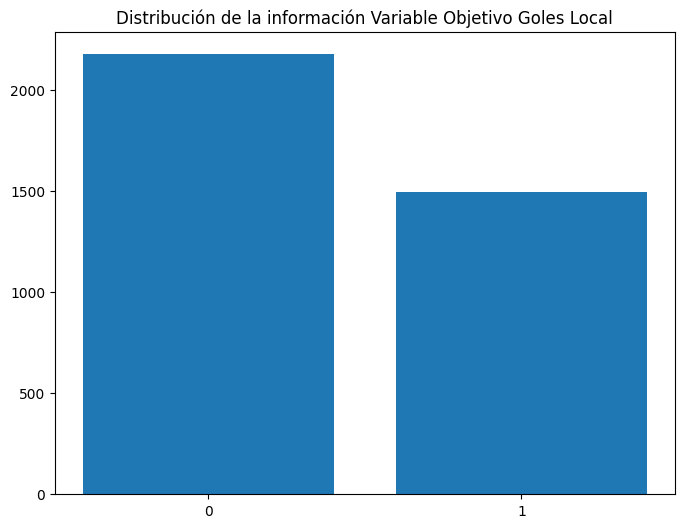

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
counts = Counter(dfy_goles_local)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.title('Distribución de la información Variable Objetivo Goles Local')
plt.show()

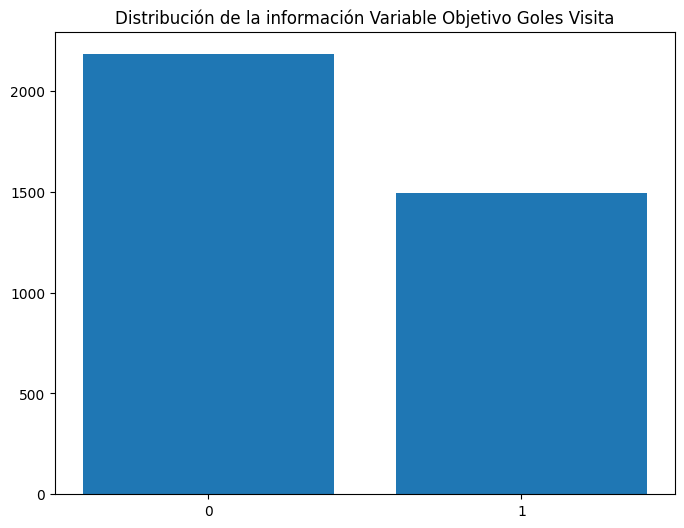

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
counts = Counter(dfy_goles_visita)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.title('Distribución de la información Variable Objetivo Goles Visita')
plt.show()

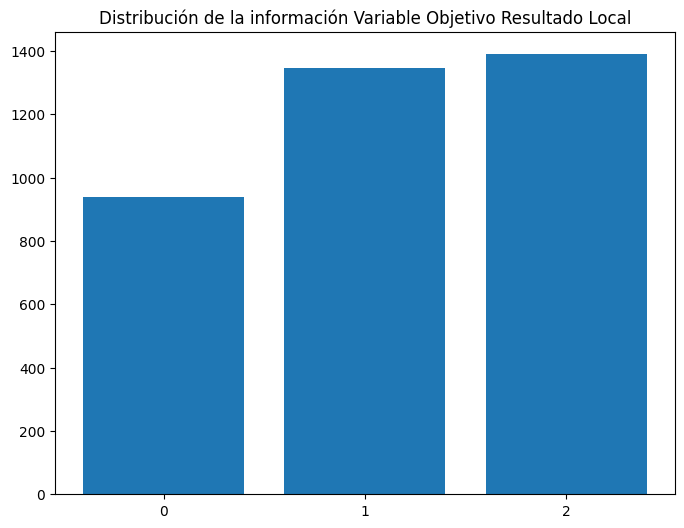

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
counts = Counter(dfy_resultado_local)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1,2])
plt.title('Distribución de la información Variable Objetivo Resultado Local')
plt.show()

separando la etiqueta en 1 gol 

In [ ]:
dfy_goles_local = np.where(df['Goles_Local'] <= 2,0 , 1)
dfy_goles_visita = np.where(df['Goles_Visitante'] <= 2,0 , 1)

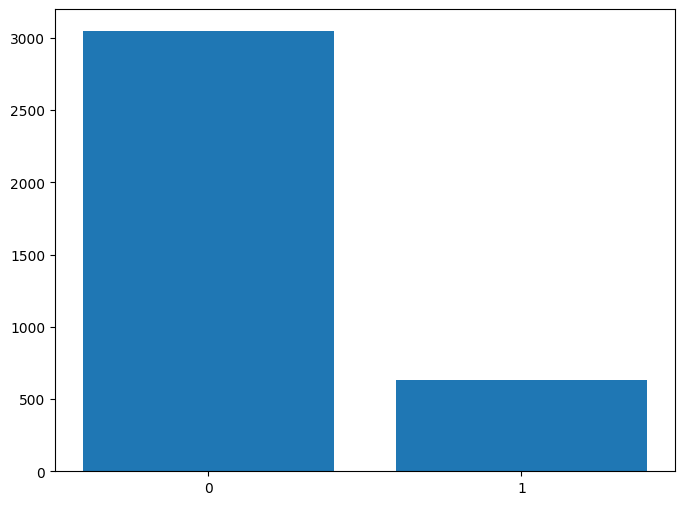

In [ ]:
from collections import Counter
fig, ax = plt.subplots(figsize=(8, 6))
counts = Counter(dfy_goles_local)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.show()

In [ ]:
dfy_goles_local = np.where(df['Goles_Local'] < 1,0, 1)

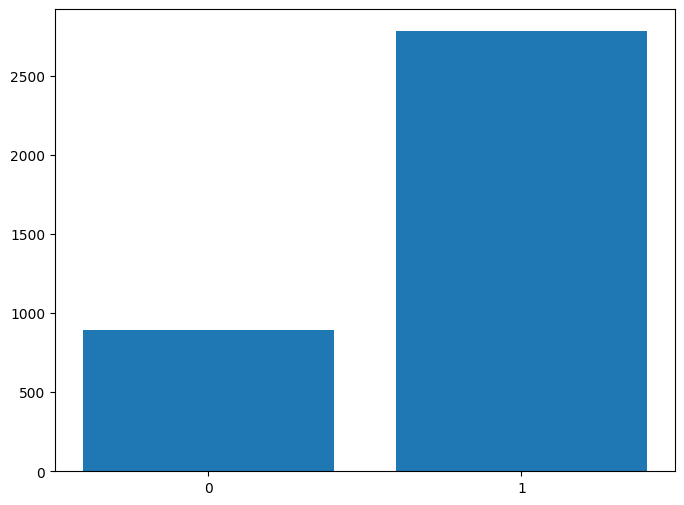

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
counts = Counter(dfy_goles_local)
plt.bar(counts.keys(), counts.values())
plt.xticks([0, 1])
plt.show()

In [ ]:
df['Goles_Local'] = np.where(df['Goles_Local'] <= 1,0 , 1)
df['Goles_Visitante'] = np.where(df['Goles_Visitante'] <= 1,0 , 1)

# Análisis de datos atípicos

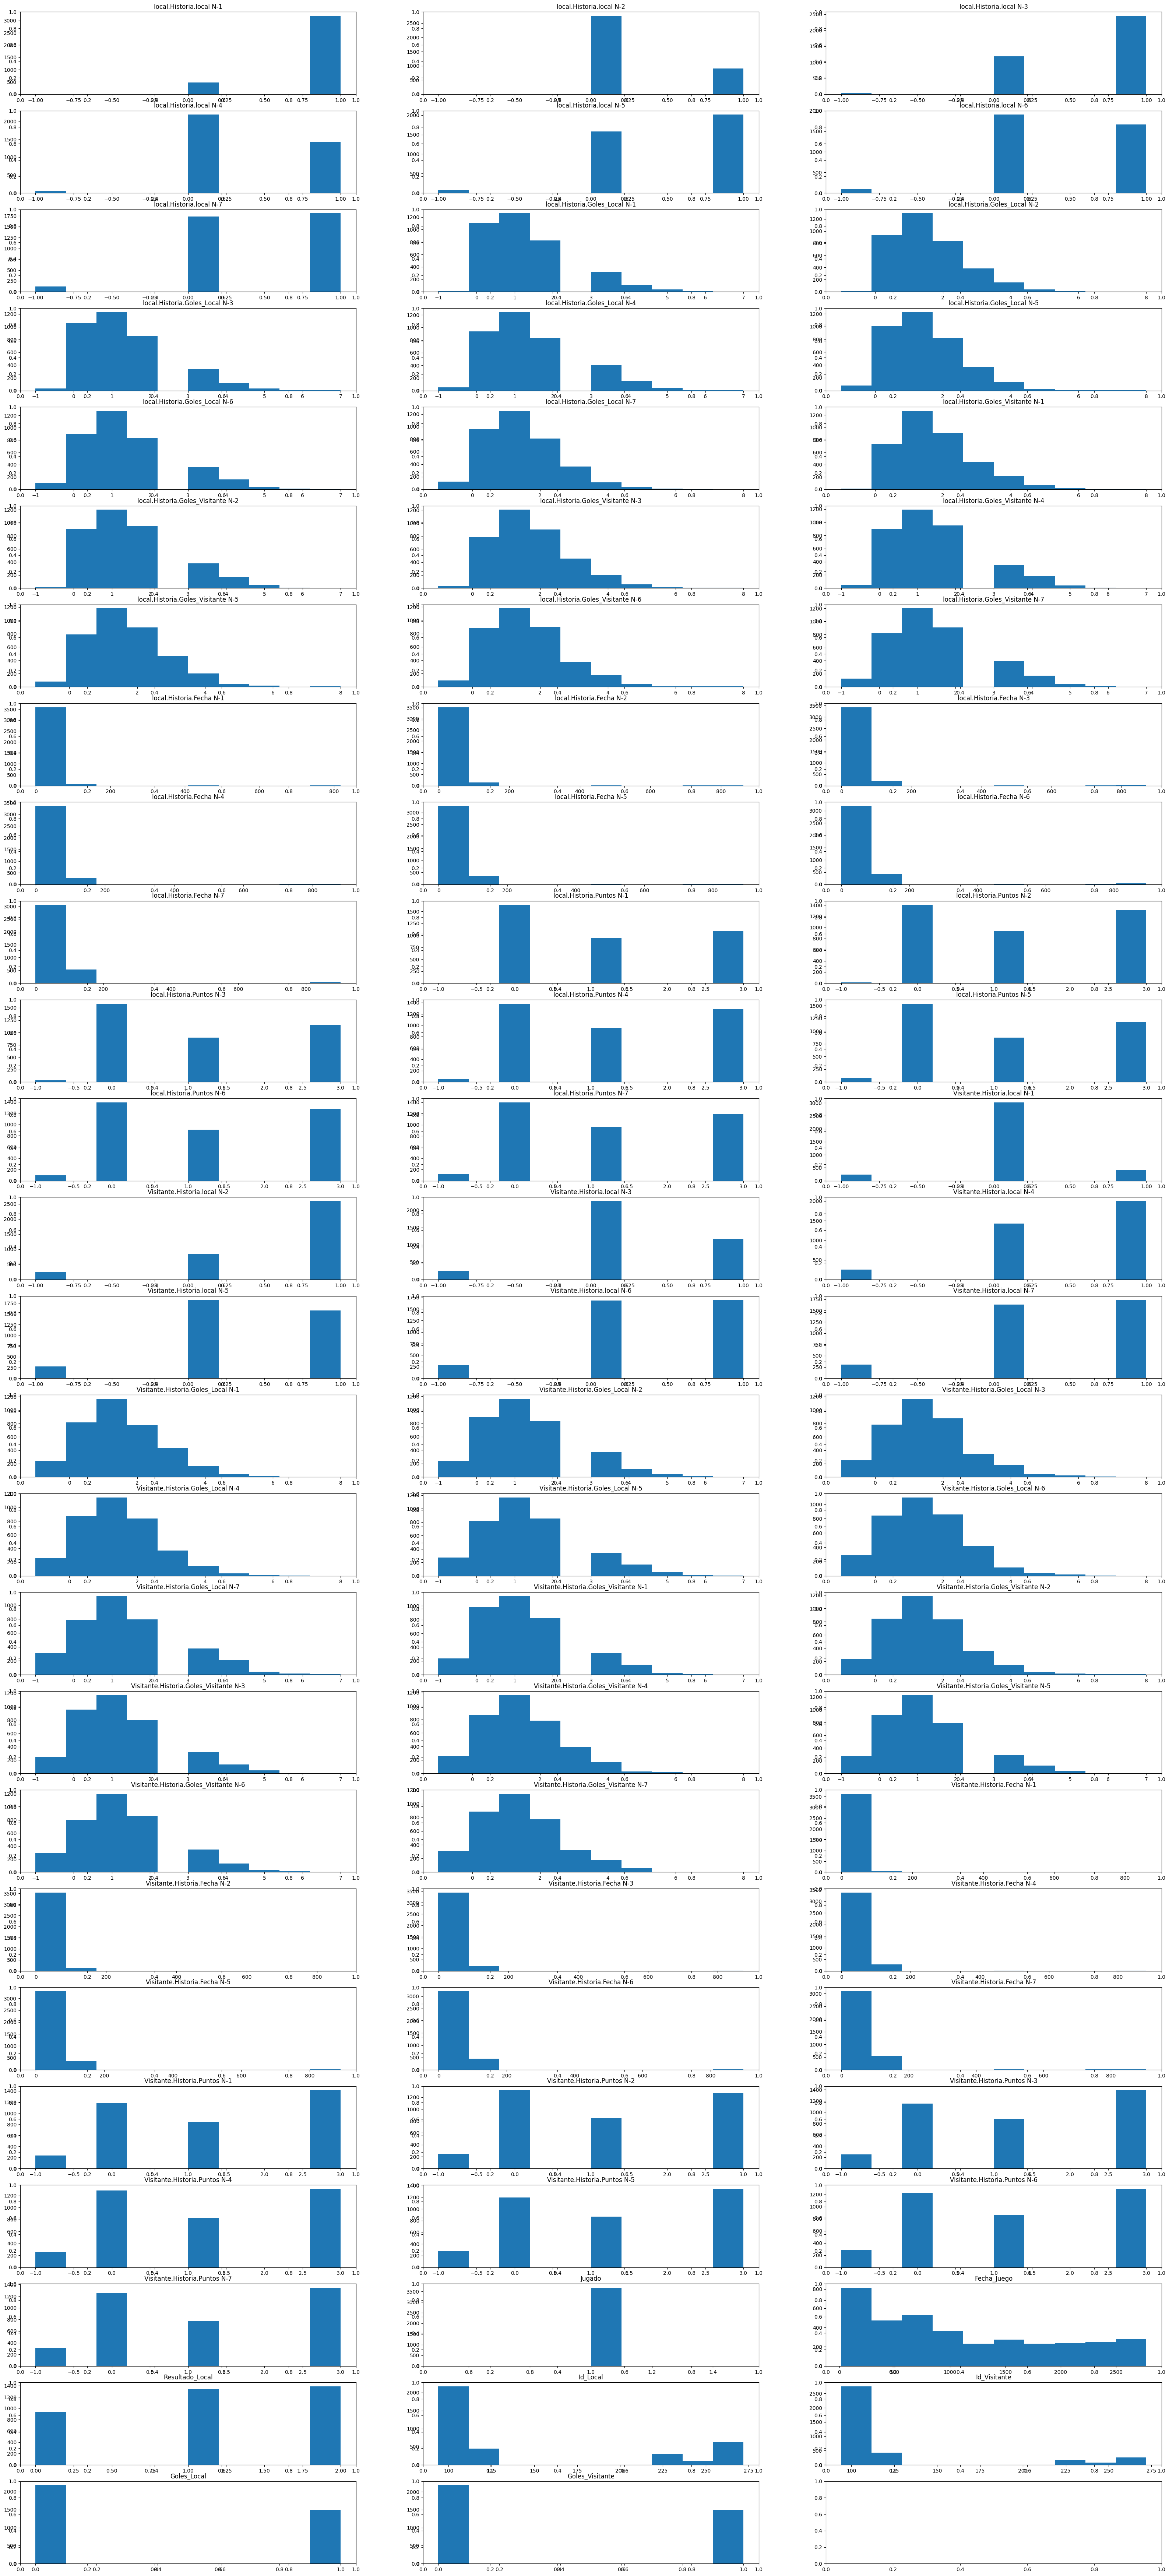

In [ ]:
#Análisis visual de la información
i = 1
num_cols = 3
num_rows = 26

figsize=(40,90)

plt.rcParams['figure.figsize'] = figsize
        
fig, axs = plt.subplots(num_rows,num_cols)

for _ in df.columns:
    
    fig.add_subplot(num_rows, num_cols, i)
    plt.hist(df[_])
    plt.title(_) 
    i +=1

Mediante el método de imputación del vecino más cercano, se procede a realizar el análisis de los datos atípicos

In [ ]:
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 'auto', metric = 'euclidean') 
# OJO, usar un número de vecinos más cercano con números impares.

Filtrado = LOF.fit_predict(df) # Se realiza la predicción de los datos atípicos

NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                   # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por 
                                   # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(df), dtype = int) 
# Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [ ]:
print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de muestras o filas con datos atípicos: ", n_errors)

Detección:  [1 1 1 ... 1 1 1]
Factores atípicos negativos:  [-0.9852552  -0.97883815 -0.98118699 ... -1.         -1.
 -1.        ]
Número de muestras o filas con datos atípicos:  210


In [ ]:
pos = np.where(Filtrado == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_LOF = df.loc[pos, :]
print("Número de muestras sin outilers:", datos_sin_outilers_LOF.shape[0])

Número de muestras sin outilers: 3465


In [ ]:
print(df.shape) # Tamaño de los datos originales
print(datos_sin_outilers_LOF.shape) # Tamaño de los datos sin outliers 
print("Los datos atípicos representan un", round((1- (datos_sin_outilers_LOF.shape[0]/df.shape[0])),3), "del total de los datos")

(3675, 77)
(3465, 77)
Los datos atípicos representan un 0.057 del total de los datos


Comprobamos segun la prueba LOF la existencia de 84 datos atípicos, la eliminación de los datos atípicos no realizadaría grandes cambios en la información dado que según el contexto de estos datos atípicos pueden dar una explicación más detallada de la base de datos.

In [ ]:
df.shape

(3675, 77)

# Análisis descriptivo

In [ ]:
MinMax_DF = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
Nombres_df = df.columns
Df_Min_Max = MinMax_DF.fit_transform(df) # Transformación de los nuevos datos con una escala MinMax
Df_escalonado = pd.DataFrame(Df_Min_Max, columns = Nombres_df)

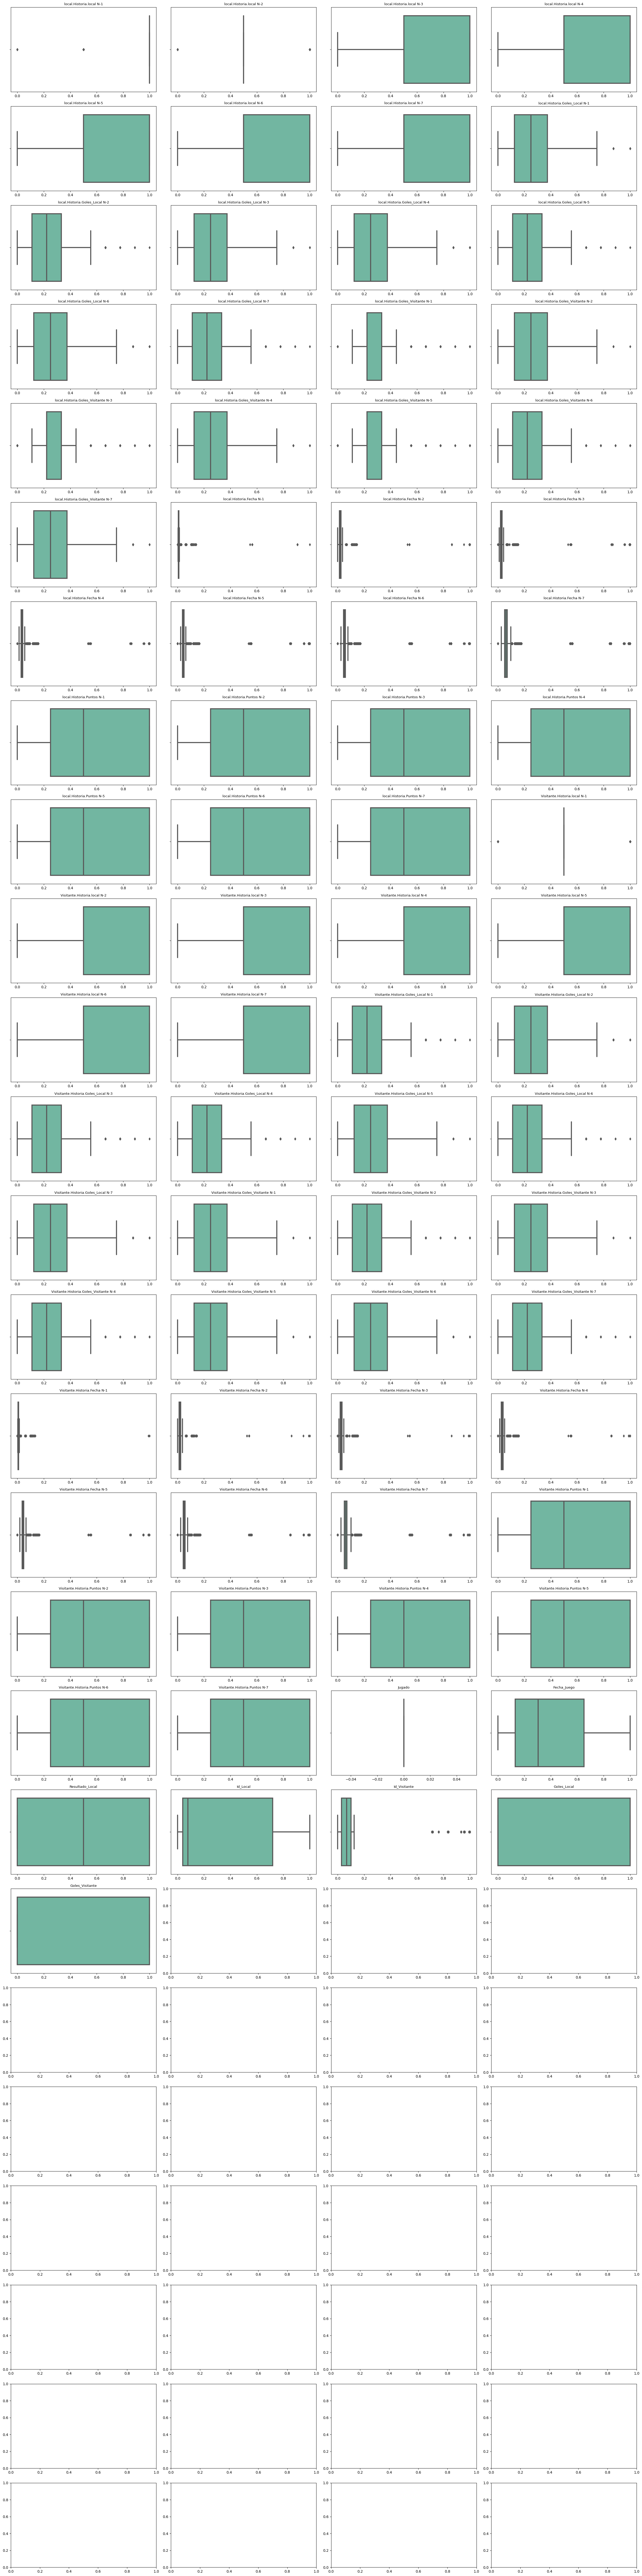

In [ ]:
# Se realiza un analisis inicial de los datos mediante un boxplot para mirar la distribución de las caracteristicas
fig, axs = plt.subplots(ncols=4, nrows=26, figsize=(25,100))
sns.set(style="whitegrid", font_scale=0.8)

i = 0
for col in Df_escalonado.columns:
    row_idx = i // 4
    col_idx = i % 4
    sns.boxplot(x=Df_escalonado[col], ax=axs[row_idx, col_idx], linewidth=3, palette="Set2", fliersize=5)
    axs[row_idx, col_idx].set_title(col)
    axs[row_idx, col_idx].set_xlabel("")
    i += 1

plt.tight_layout()
plt.show()

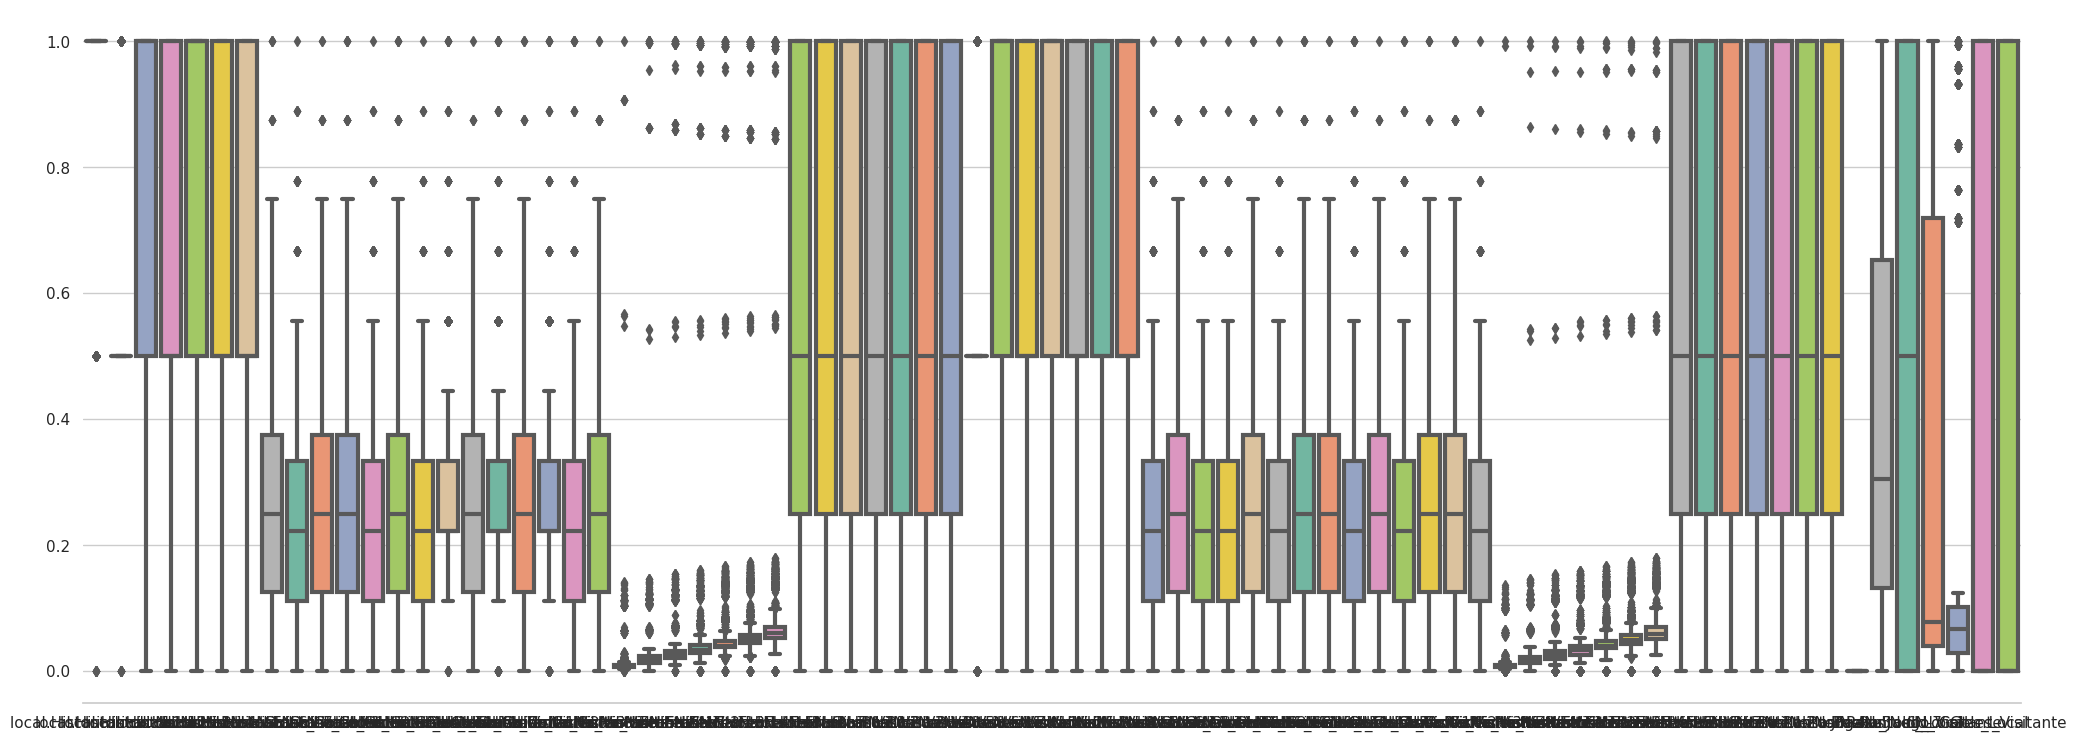

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Df_escalonado, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

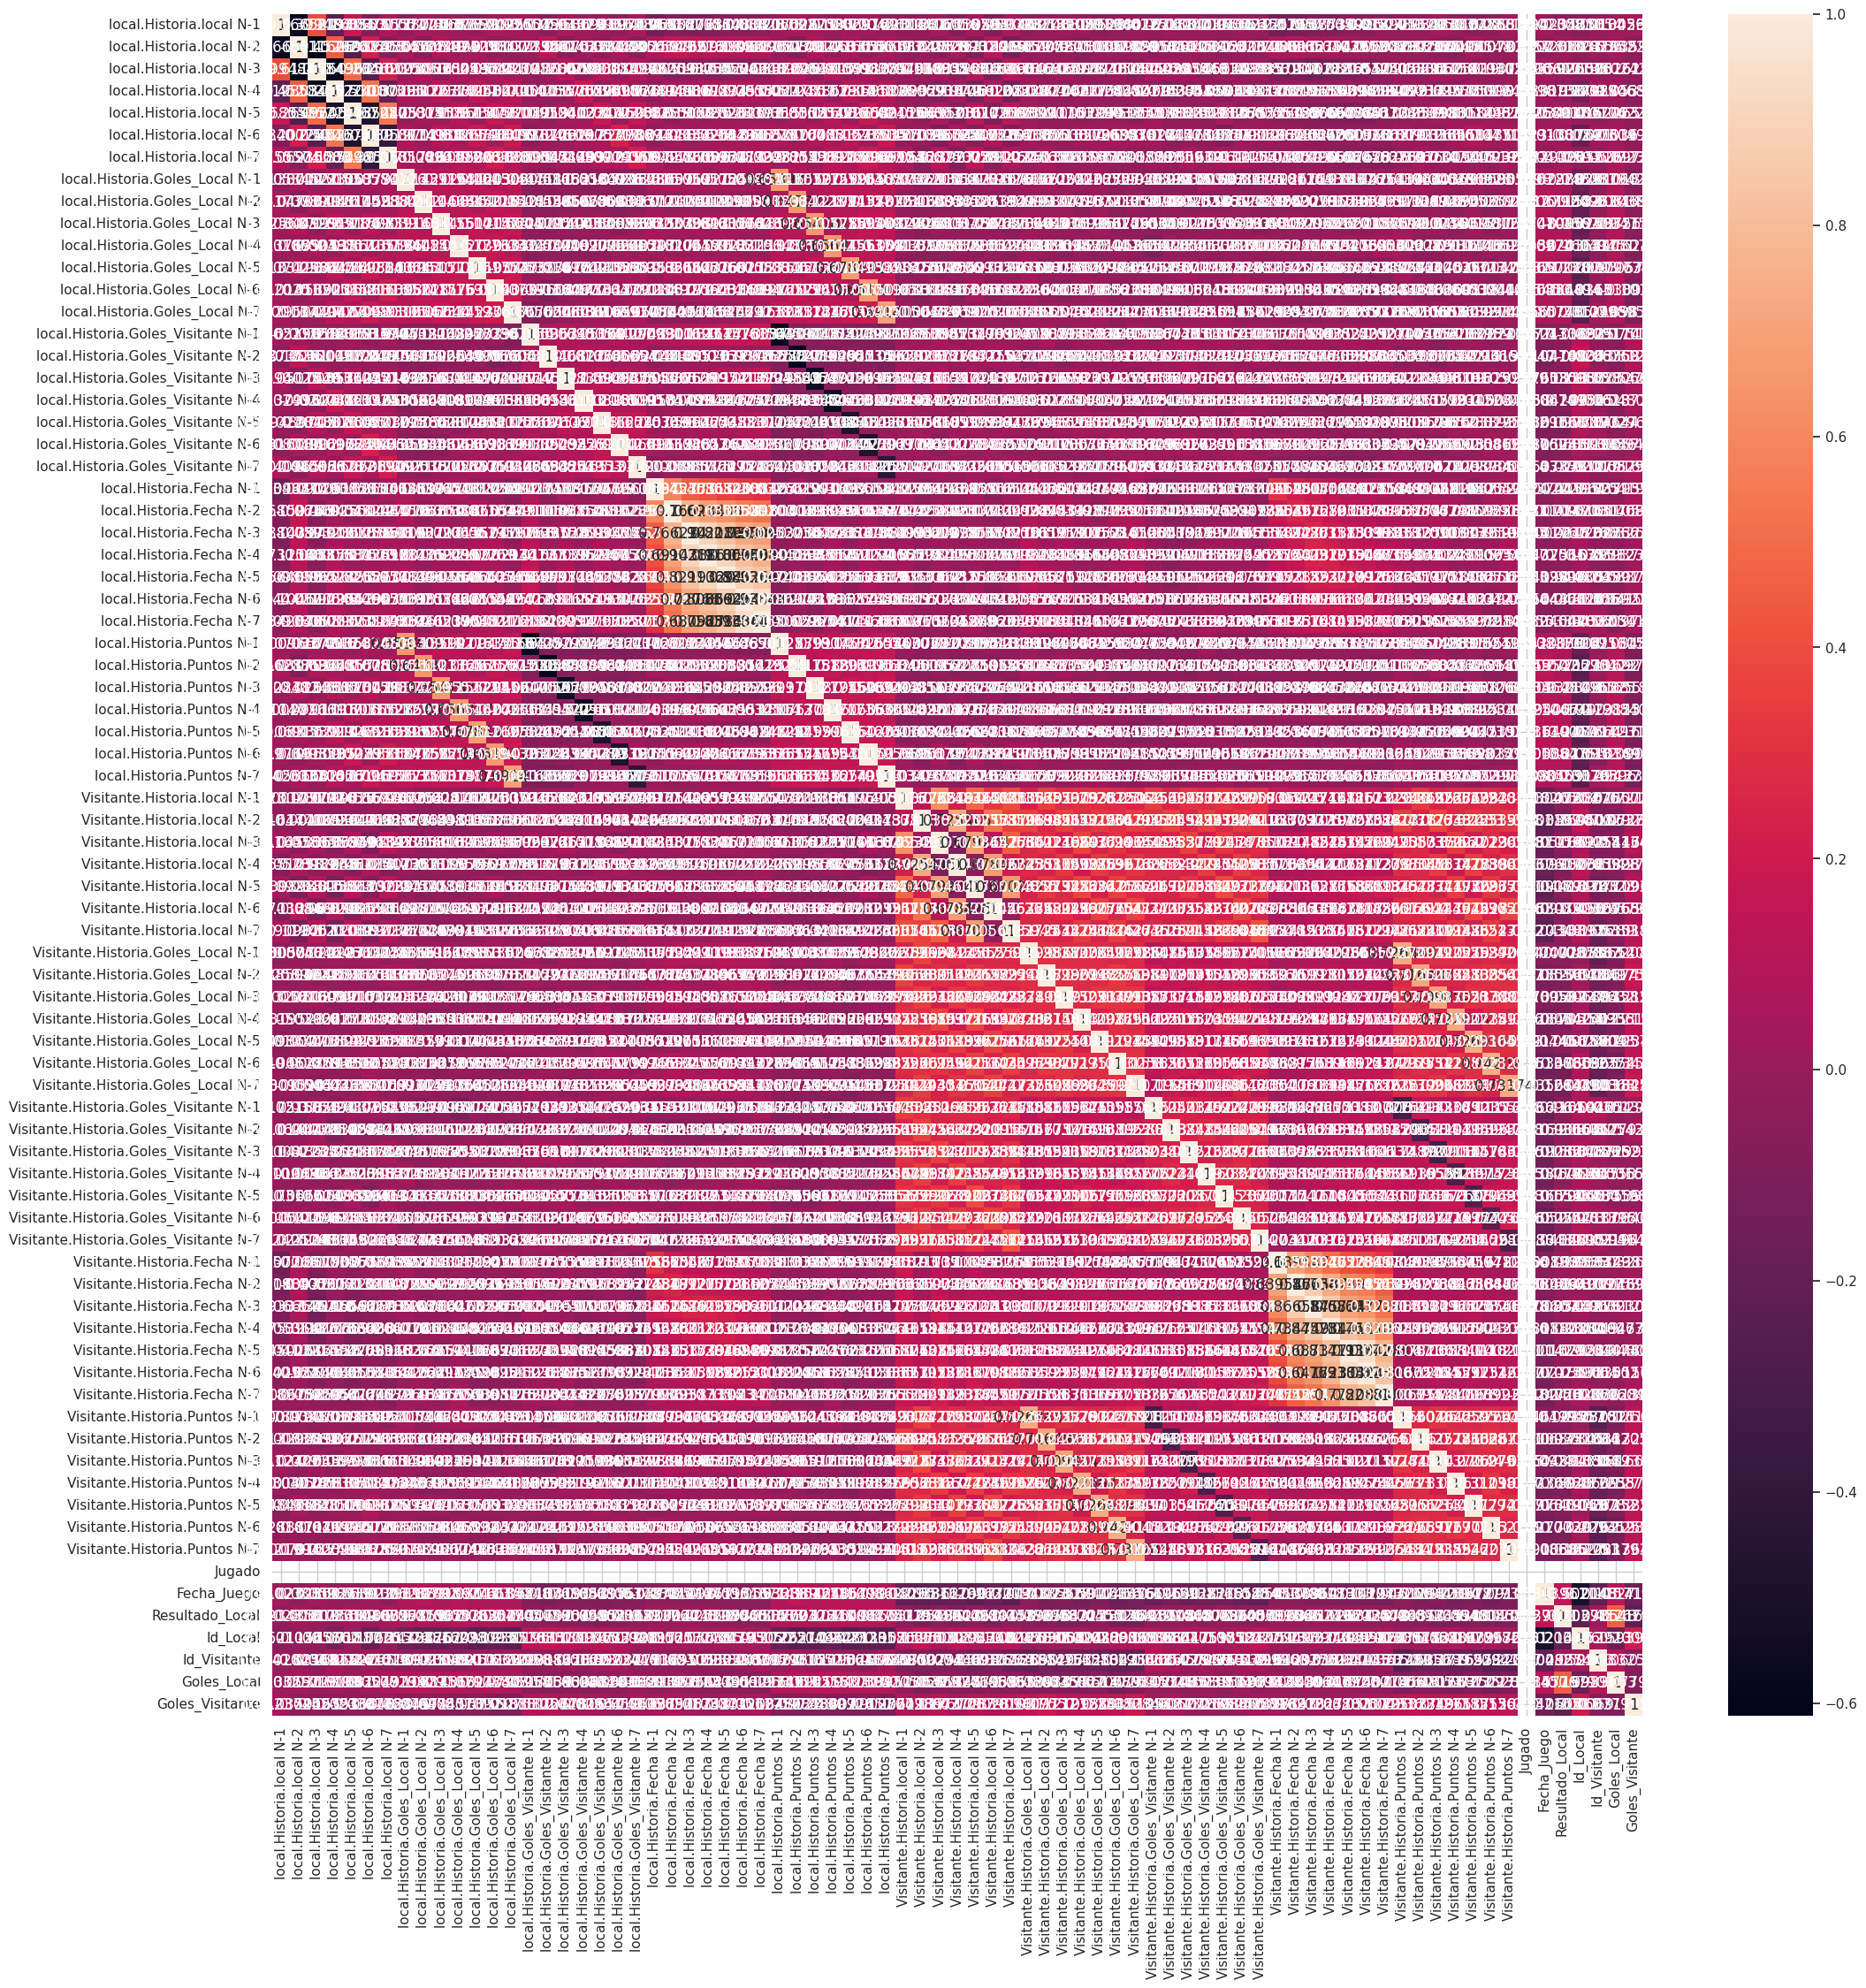

In [ ]:
Matriz_Correlacion = df.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(Matriz_Correlacion, annot=True, fmt='g', xticklabels = df.columns, yticklabels = df.columns)
plt.show()

# Dividir el conjunto de datos

Para nuestro objetivo tenemos 3 columnas que podrían ser nuestras variables objetivos, dado esto se realizará inicialmente con los goles de local


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')  

In [ ]:
# Se leen los dataset descargados para siempre trabajar con  la misma info
# df=pd.read_csv('/content/df.csv')
# dfy_goles_local=pd.read_csv('/content/dfy_goles_local.csv')
# dfy_goles_visita=pd.read_csv('/content/dfy_goles_visita.csv')
# dfy_resultado_local=pd.read_csv('/content/dfy_resultado_local.csv')

In [ ]:
data = df.copy()

In [ ]:
#Para entrenar el modelo
dfy_goles_local=df['Goles_Local']
dfy_goles_visita=df['Goles_Visitante']
dfy_resultado_local=df['Resultado_Local']

df=df.drop(['Goles_Local','Goles_Visitante','Resultado_Local'], axis=1) 

In [ ]:
#Para probar el modelo final
#Para entrenar el modelo
df_partidos_sin_jugar_goles_local=df_partidos_sin_jugar['Goles_Local']
df_partidos_sin_jugar_goles_visita=df_partidos_sin_jugar['Goles_Visitante']
df_partidos_sin_jugar_resultado_local=df_partidos_sin_jugar['Resultado_Local']


df_partidos_sin_jugar= df_partidos_sin_jugar.drop(['Goles_Local','Goles_Visitante','Resultado_Local'], axis=1) 

print(df_partidos_sin_jugar.shape)

(195, 74)


In [ ]:
numCols= df.select_dtypes(include = ["float64"]).columns.tolist()

In [ ]:
X = df
Y = dfy_goles_local

In [ ]:
df.head(10)

local.Historia.local N-1  local.Historia.local N-2  \
0                       1.0                       0.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       1.0   
4                       1.0                       0.0   
5                       1.0                       0.0   
6                       1.0                       0.0   
7                       0.0                       1.0   
8                       1.0                       0.0   
9                       1.0                       0.0   

   local.Historia.local N-3  local.Historia.local N-4  \
0                       0.0                       1.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       0.0                       1.0   
4                       1.0                       1.0   
5                       1.0                       0.0   
6                       1.0                       0.0   
7                       0.0                       1.0   
8                       0.0                       1.0   
9                       1.0                       0.0   

   local.Historia.local N-5  local.Historia.local N-6  \
0                       0.0                       1.0   
1                       0.0                       1.0   
2                       1.0                       0.0   
3                       0.0                       1.0   
4                       0.0                       1.0   
5                       1.0                       1.0   
6                       1.0                       0.0   
7                       0.0                       1.0   
8                       0.0                       1.0   
9                       0.0                       1.0   

   local.Historia.local N-7  local.Historia.Goles_Local N-1  \
0                       1.0                             3.0   
1                       0.0                             1.0   
2                       0.0                             1.0   
3                       0.0                             0.0   
4                       0.0                             1.0   
5                       0.0                             1.0   
6                       1.0                             0.0   
7                       0.0                             0.0   
8                       0.0                             1.0   
9                       0.0                             0.0   

   local.Historia.Goles_Local N-2  local.Historia.Goles_Local N-3  \
0                             0.0                             1.0   
1                             2.0                             3.0   
2                             0.0                             1.0   
3                             0.0                             2.0   
4                             1.0                             0.0   
5                             1.0                             1.0   
6                             1.0                             1.0   
7                             0.0                             1.0   
8                             1.0                             0.0   
9                             2.0                             1.0   

   local.Historia.Goles_Local N-4  local.Historia.Goles_Local N-5  \
0                             2.0                             1.0   
1                             0.0                             1.0   
2                             2.0                             3.0   
3                             1.0                             0.0   
4                             0.0                             2.0   
5                             1.0                             0.0   
6                             1.0                             1.0   
7                             1.0                             1.0   
8                             0.0           

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

print("Tamaño de los Datos de Entrenamiento = ", X_train.shape)
print("Tamaño de los Datos de Validación = ", X_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (2940, 74)
Tamaño de los Datos de Validación =  (735, 74)
Tamaño del Vector de Clases de Entrenamiento =  (2940, 1)
Tamaño del Vector de Clases de Prueba =  (735, 1)


# KNN y Guassian Bayes

In [ ]:
X_train_KNN_GB = X_train.copy()
y_train_KNN_GB = y_train.copy()

CREACIÓN DEL MODELO

In [ ]:
modelKNN   = KNeighborsClassifier(n_neighbors=10)
modelBNB   = BernoulliNB(binarize=True)
modelGNB   = GaussianNB()

In [ ]:
#Entrenamiento del modelo con 80% de training

modelKNN.fit(X_train_KNN_GB, y_train_KNN_GB)
modelBNB.fit(X_train_KNN_GB, y_train_KNN_GB)
modelGNB.fit(X_train_KNN_GB, y_train_KNN_GB)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

EVALUACIÓN DEL MODELO

In [ ]:
y_modelKNN = modelKNN.predict(X_test)
y_modelBNB = modelBNB.predict(X_test)
y_modelGNB = modelGNB.predict(X_test)

In [ ]:
print("===========Accuracy KNN Gaussian NB ================")
print("modelKNN:",metrics.accuracy_score(y_test, y_modelKNN))
print("modelBNB:",metrics.accuracy_score(y_test, y_modelBNB))
print("modelGNB:",metrics.accuracy_score(y_test, y_modelGNB))

===========Accuracy KNN Gaussian NB ================
modelKNN: 0.6312925170068027
modelBNB: 0.6448979591836734
modelGNB: 0.6326530612244898


### Matriz confusión

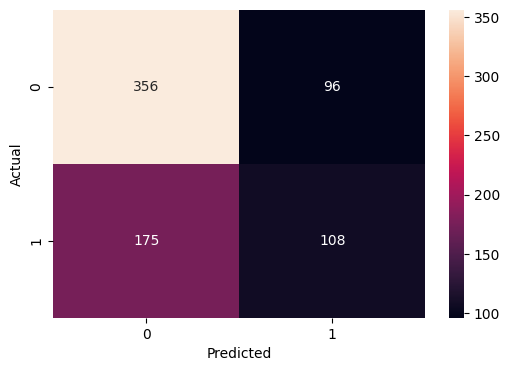

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       452
           1       0.53      0.38      0.44       283

    accuracy                           0.63       735
   macro avg       0.60      0.58      0.58       735
weighted avg       0.62      0.63      0.62       735



In [ ]:
#Matriz de confusión
conf_mat = confusion_matrix(y_test, y_modelKNN)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_modelKNN))

### Receiver Operating Characteristic (ROC)

In [ ]:
e_dataframe = pd.DataFrame(y_test)
arr = e_dataframe.to_numpy().astype(int)

0.70: KNeighborsClassifier(n_neighbors=10)
0.67: BernoulliNB(binarize=True)
0.69: GaussianNB()


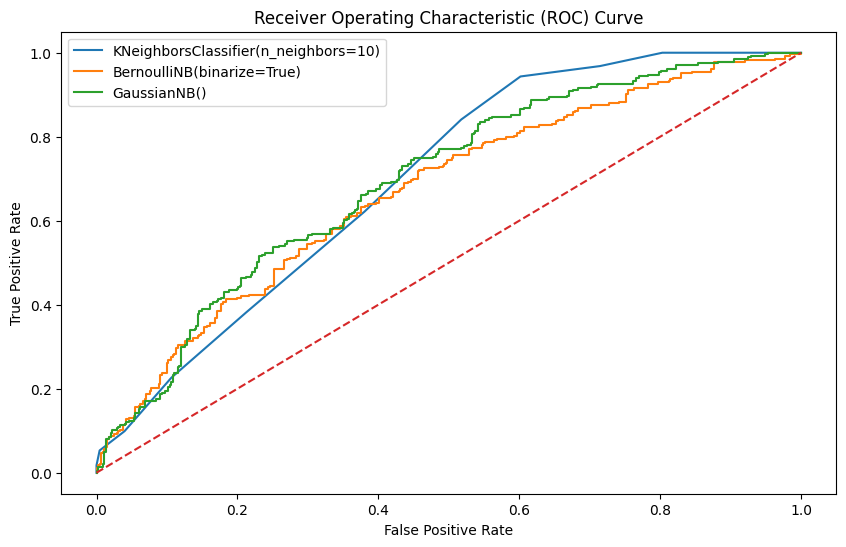

In [ ]:
fig = plt.figure(figsize=(10,6))

Modelos = [modelKNN, modelBNB, modelGNB]

for i in range(len(Modelos)):
    
    probs = Modelos[i].predict_proba(X_test)
    probs = probs[:, 1]
    auc = roc_auc_score(arr, probs*(1))

    fpr, tpr, _ = roc_curve(arr, probs*(1))
    
    plt.plot(fpr, tpr,  label=Modelos[i])

    print("{:.2f}: {}".format(auc, Modelos[i]))


plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Validación cruzada

In [ ]:
modelSVC_cross_KNN = modelKNN

In [ ]:
#numCols is cols sin goles Local 
# organizo los datos completos para la valiación cruzada

X = df[numCols]
y = Y

num_vars = numCols

X_Completo = X
y_Completo = y

In [ ]:
CV = 10 #Folks:  Pliegues - en cuanto divido los datos
scoring = 'accuracy' 
entries = []
accuracies_KNN = cross_val_score(modelSVC_cross_KNN, X_Completo, y_Completo, cv=CV, scoring=scoring)

for division_idx, accuracy in enumerate(accuracies_KNN):
    entries.append(( division_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['division_idx', 'accuracy'])

In [ ]:
#analizo la precisión en cada pliegue
print(cv_df)
print('accuracy', cv_df.accuracy.mean())

   division_idx  accuracy
0             0  0.470109
1             1  0.548913
2             2  0.491848
3             3  0.456522
4             4  0.554348
5             5  0.702997
6             6  0.716621
7             7  0.378747
8             8  0.678474
9             9  0.528610
accuracy 0.5527188721715437


In [ ]:
grid_hiperparametros = {'var_smoothing': [1e-9, 1e-8, 1e-7], 'priors': [[0.25, 0.75], [0.5, 0.5], [0.75, 0.25]]}

#las metricas sobre las se evaluará el modelo
metricas = ['roc_auc', 'accuracy']


# Definimos la busqueda mediante 10-fold CV - degree=8, coef0=2.0 modelSVC_cross_KNN
busqueda_grid = GridSearchCV(modelSVC_cross_KNN, param_grid = grid_hiperparametros , cv = 10 , scoring = metricas, refit='accuracy', verbose=4)

# Aplicamos la busqueda
busqueda_grid.fit(X_Completo, y_Completo)
print("Mejores parámetros:", busqueda_grid.best_params_)
print("Mejor rendimiento:", busqueda_grid.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END priors=[0.25, 0.75], var_smoothing=1e-09; accuracy: (test=0.451) roc_auc: (test=0.583) total time=   0.0s
[CV 2/10] END priors=[0.25, 0.75], var_smoothing=1e-09; accuracy: (test=0.497) roc_auc: (test=0.591) total time=   0.0s
[CV 3/10] END priors=[0.25, 0.75], var_smoothing=1e-09; accuracy: (test=0.440) roc_auc: (test=0.614) total time=   0.0s
[CV 4/10] END priors=[0.25, 0.75], var_smoothing=1e-09; accuracy: (test=0.413) roc_auc: (test=0.553) total time=   0.0s
[CV 5/10] END priors=[0.25, 0.75], var_smoothing=1e-09; accuracy: (test=0.448) roc_auc: (test=0.713) total time=   0.0s
[CV 6/10] END priors=[0.25, 0.75], var_smoothing=1e-09; accuracy: (test=0.689) roc_auc: (test=0.735) total time=   0.0s
[CV 7/10] END priors=[0.25, 0.75], var_smoothing=1e-09; accuracy: (test=0.629) roc_auc: (test=0.772) total time=   0.0s
[CV 8/10] END priors=[0.25, 0.75], var_smoothing=1e-09; accuracy: (test=0.292) roc_auc: (test=0.184

In [ ]:
#Entrenar el modelo con los mejores hiperparametros
modelKNN_b = modelKNN(priors = [0.75, 0.25],var_smoothing=1e-09)
modelKNN_b.fit(X_train_KNN_GB, y_train_KNN_GB)
y_modelKNN_b = modelKNN.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("modelKNN:",metrics.accuracy_score(y_test, y_modelKNN_b))

modelGNB: 0.6326530612244898


# Arboles de decisión

In [ ]:
X_train_Decision_Tree = X_train.copy()
y_train_Decision_Tree = y_train.copy()
X_test_Decision_Tree = X_test.copy()
y_test_Decision_Tree = y_test.copy()

In [ ]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_Decision_Tree, y_train_Decision_Tree)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [ ]:
labels=list(data.columns)

Profundidad del árbol: 5
Número de nodos terminales: 31


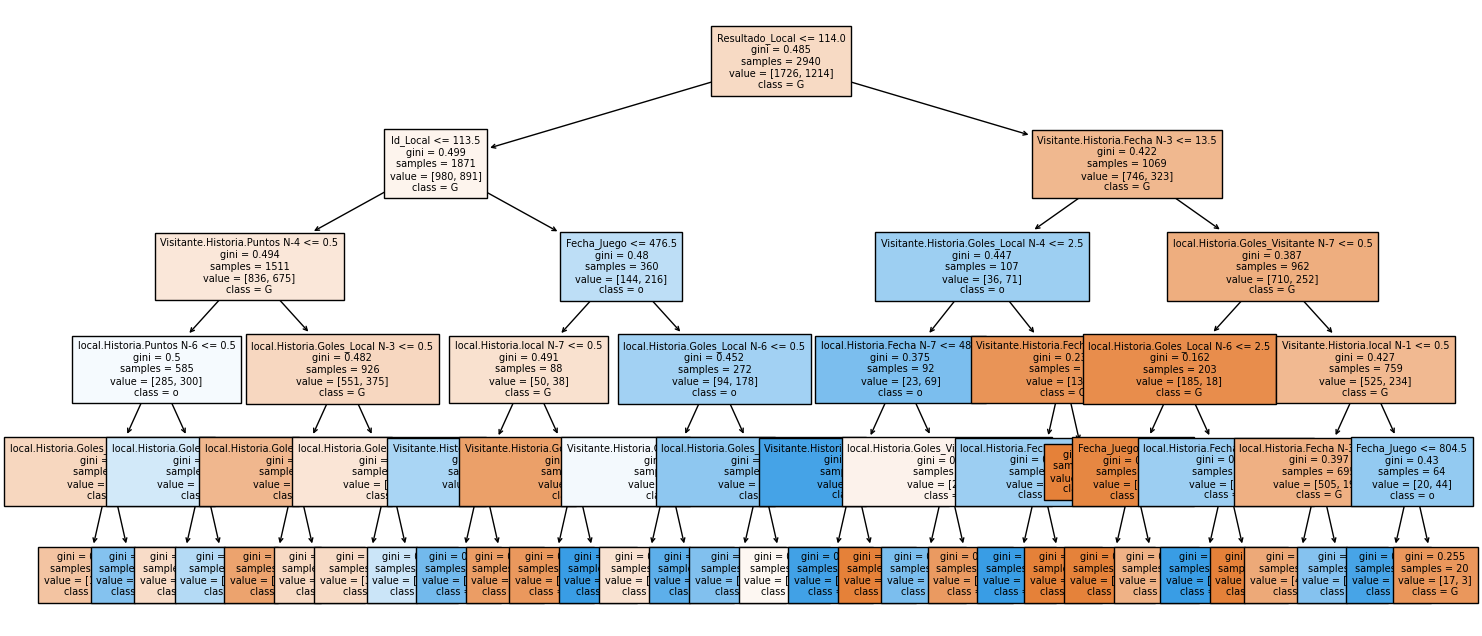

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(18, 8))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels,
            class_names   = 'Goles_Local',
            filled        = True,
            impurity      = True,
            fontsize      = 7,
            ax            = ax
       )

In [ ]:
y_pred_Decision_Tree = modelo.predict(X_test_Decision_Tree)

In [ ]:
#Exactitud
print("Accuracy:",metrics.accuracy_score(y_test_Decision_Tree, y_pred_Decision_Tree))

Accuracy: 0.6517006802721088


### Matriz confusión

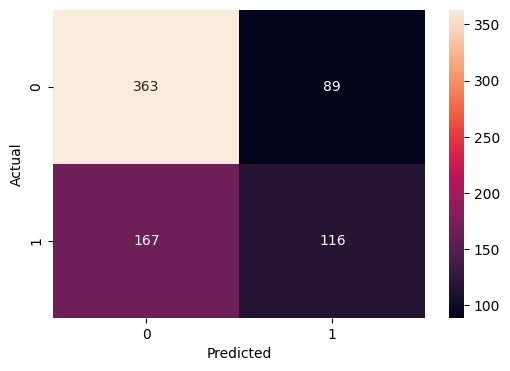

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       452
           1       0.57      0.41      0.48       283

    accuracy                           0.65       735
   macro avg       0.63      0.61      0.61       735
weighted avg       0.64      0.65      0.64       735



In [ ]:
conf_mat = confusion_matrix(y_test_Decision_Tree, y_pred_Decision_Tree)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_Decision_Tree, y_pred_Decision_Tree))

### Validación cruzada

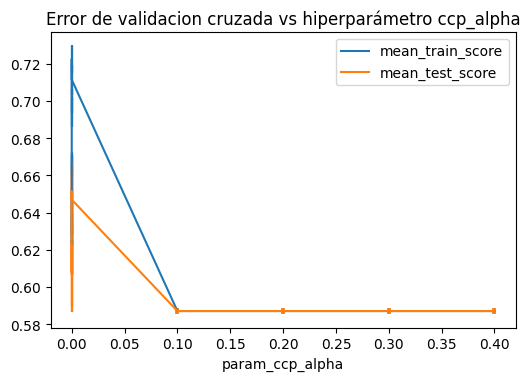

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4]}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_Decision_Tree, y_train_Decision_Tree)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
# Mejores valores encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

In [ ]:
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 6,
            criterion         = 'entropy', min_samples_split = 4,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_Decision_Tree, y_train_Decision_Tree)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=4,
                       random_state=123)

In [ ]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

Profundidad del árbol: 6
Número de nodos terminales: 51


In [ ]:
y_pred_Decision_Tree = modelo.predict(X_test_Decision_Tree)

In [ ]:
#Exactitud
print("Accuracy:",metrics.accuracy_score(y_test_Decision_Tree, y_pred_Decision_Tree))

Accuracy: 0.6585034013605442


# Random Forest

In [ ]:
X_train_Random_Forest_Clas = X_train.copy()
y_train_Random_Forest_Clas = y_train.copy()
X_test_Random_Forest_Clas = X_test.copy()
y_test_Random_Forest_Clas = y_test.copy()

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)
    
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head()

<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓


<ipython-input-85-cceb204a2e92>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train_Random_Forest_Clas, y_train_Random_Forest_Clas)


Modelo: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


oob_accuracy criterion  max_depth  max_features  n_estimators
6       0.703401      gini       10.0             5           150
0       0.702381      gini        NaN             5           150
20      0.699660   entropy       10.0             9           150
8       0.699320      gini       10.0             9           150
9       0.698980      gini       20.0             5           150

In [ ]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print("--------------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Mejores hiperparámetros encontrados (oob-accuracy)
--------------------------------------------------
0.7034013605442176 : 0.7034013605442176 accuracy


### Validación cruzada

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [200],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_Random_Forest_Clas , y = y_train_Random_Forest_Clas)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

param_criterion param_max_depth param_max_features param_n_estimators  \
8             gini              20                  9                200   
7             gini              20                  7                200   
2             gini            None                  9                200   
15         entropy              20                  5                200   

    mean_test_score  std_test_score  mean_train_score  std_train_score  
8          0.702948        0.025038               1.0              0.0  
7          0.702608        0.019139               1.0              0.0  
2          0.701927        0.024397               1.0              0.0  
15         0.700454        0.019230               1.0              0.0

In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 20, 'max_features': 9, 'n_estimators': 200} : 0.7029478458049888 accuracy


In [ ]:
modelo_final = grid.best_estimator_

In [ ]:
# Error de test del modelo final
# ==============================================================================
predicciones = modelo_final.predict(X = X_test_Random_Forest_Clas)
predicciones[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
#Exactitud
print("Accuracy:",metrics.accuracy_score(y_test_Random_Forest_Clas, predicciones))

Accuracy: 0.7346938775510204


### Matriz de confusión

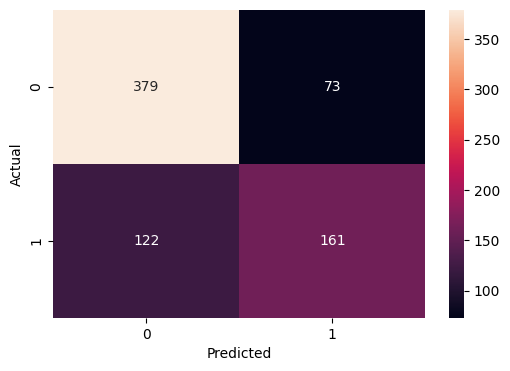

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       452
           1       0.69      0.57      0.62       283

    accuracy                           0.73       735
   macro avg       0.72      0.70      0.71       735
weighted avg       0.73      0.73      0.73       735

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       452
           1       0.69      0.57      0.62       283

    accuracy                           0.73       735
   macro avg       0.72      0.70      0.71       735
weighted avg       0.73      0.73      0.73       735



In [ ]:
conf_mat = confusion_matrix(y_test_Decision_Tree, predicciones)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_Decision_Tree, predicciones))
print(classification_report(y_test_Decision_Tree, predicciones))

#Regresion Logistica

In [ ]:
X_train_RL = X_train.copy()
y_train_RL = y_train.copy()
X_test_RL = X_test.copy()
y_test_RL = y_test.copy()

In [ ]:
logreg = LogisticRegression(max_iter=1000,solver="sag",)
logreg.fit(X_train_RL, y_train_RL)
y_pred_RL = logreg.predict(X_test_RL)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print("Modelo Regresión Logistica:",metrics.accuracy_score(y_test_RL, y_pred_RL))

Modelo Regresión Logistica: 0.6571428571428571


### Matriz de confusión

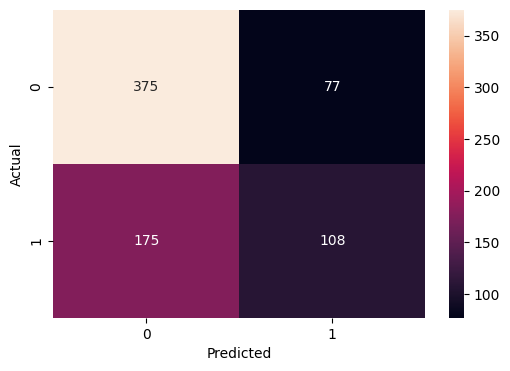

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       452
           1       0.58      0.38      0.46       283

    accuracy                           0.66       735
   macro avg       0.63      0.61      0.61       735
weighted avg       0.64      0.66      0.64       735

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       452
           1       0.58      0.38      0.46       283

    accuracy                           0.66       735
   macro avg       0.63      0.61      0.61       735
weighted avg       0.64      0.66      0.64       735



In [ ]:
conf_mat = confusion_matrix(y_test_RL, y_pred_RL)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_RL, y_pred_RL))
print(classification_report(y_test_RL, y_pred_RL))

##Validación cruzada

In [ ]:
X = df[numCols]
y = Y
num_vars = numCols
X_Completo = X
y_Completo = y

In [ ]:
logreg = LogisticRegression()
scores_logreg_cross_val = cross_val_score(logreg, X, y, cv=10,scoring="accuracy")
for division_idx, accuracy in enumerate(scores_logreg_cross_val):
    entries.append(( division_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['division_idx', 'accuracy'])
print('accuracy', cv_df.accuracy.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

accuracy 0.5733651226158039


### Hiperparametros

In [ ]:
parameters = {'penalty': ['none', 'l2'],'max_iter':[1000,10000],'solver':["sag","newton-cg", "lbfgs", "liblinear"],'multi_class':["ovr","multinomial"]}
grid = GridSearchCV(logreg, parameters, cv=5)
grid.fit(X_train_RL, y_train_RL)
print("Mejores parámetros: ", grid.best_params_)
print("Puntaje de validación cruzada promedio: ", grid.best_score_)
print("Puntaje en los datos de prueba: ", grid.score(X_test_RL, y_test_RL))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column

Mejores parámetros:  {'max_iter': 10000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Puntaje de validación cruzada promedio:  0.6241496598639455
Puntaje en los datos de prueba:  0.6462585034013606


##Regresión definitiva

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


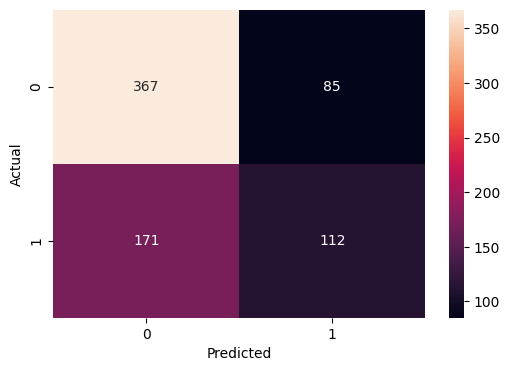

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       452
           1       0.57      0.40      0.47       283

    accuracy                           0.65       735
   macro avg       0.63      0.60      0.60       735
weighted avg       0.64      0.65      0.64       735

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       452
           1       0.57      0.40      0.47       283

    accuracy                           0.65       735
   macro avg       0.63      0.60      0.60       735
weighted avg       0.64      0.65      0.64       735



In [ ]:
logreg = LogisticRegression(max_iter= 1000, multi_class= 'multinomial', penalty= 'l2', solver= 'sag')
logreg.fit(X_train_RL, y_train_RL)
y_pred_RLF = logreg.predict(X_test_RL)
conf_mat = confusion_matrix(y_test_RL, y_pred_RLF)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_RL, y_pred_RLF))
print(classification_report(y_test_RL, y_pred_RLF))


# Maquina de Soporte de Vectores MSV

In [ ]:
X_train_MSV = X_train.copy()
y_train_MSV = y_train.copy()
X_test_MSV = X_test.copy()
y_test_MSV = y_test.copy()

In [ ]:
model_SVC = SVC(kernel='linear', C=1)
model_SVC.fit(X_train_MSV, y_train_MSV)
y_pred_SVC = model_SVC.predict(X_test_MSV)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Modelo MSV:",metrics.accuracy_score(y_test_MSV, y_pred_SVC))

Modelo MSV: 0.6435374149659864


### Matriz de confusión

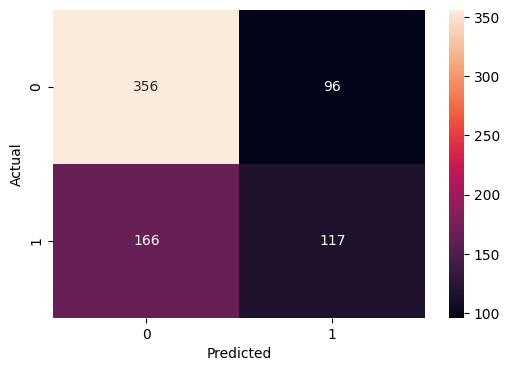

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       452
           1       0.55      0.41      0.47       283

    accuracy                           0.64       735
   macro avg       0.62      0.60      0.60       735
weighted avg       0.63      0.64      0.63       735

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       452
           1       0.55      0.41      0.47       283

    accuracy                           0.64       735
   macro avg       0.62      0.60      0.60       735
weighted avg       0.63      0.64      0.63       735



In [ ]:
conf_mat = confusion_matrix(y_test_MSV, y_pred_SVC)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_MSV, y_pred_SVC))
print(classification_report(y_test_MSV, y_pred_SVC))

# GFradient Boosting

In [ ]:
X_train_GFradient = X_train.copy()
y_train_GFradient = y_train.copy()
X_test_GFradient = X_test.copy()
y_test_GFradient = y_test.copy()

In [ ]:
# Definición de parámetros
params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 3
}

# Entrenamiento del modelo
model = GradientBoostingClassifier(**params)
model.fit(X_train_GFradient, y_train_GFradient)

# Evaluación del modelo
y_pred = model.predict(X_test_GFradient)
accuracy = accuracy_score(y_test_GFradient, y_pred)
print(f"Precisión: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión: 0.7414965986394558


### Matriz de confusión

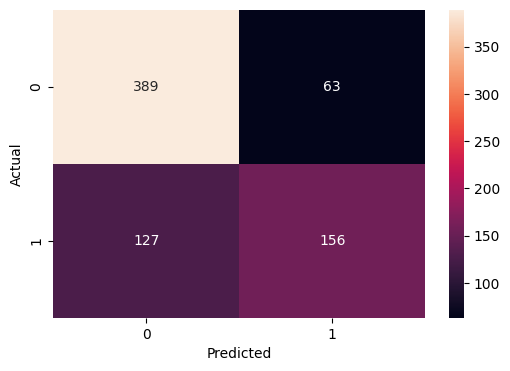

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       452
           1       0.71      0.55      0.62       283

    accuracy                           0.74       735
   macro avg       0.73      0.71      0.71       735
weighted avg       0.74      0.74      0.73       735

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       452
           1       0.71      0.55      0.62       283

    accuracy                           0.74       735
   macro avg       0.73      0.71      0.71       735
weighted avg       0.74      0.74      0.73       735



In [ ]:
conf_mat = confusion_matrix(y_test_GFradient, y_pred)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_GFradient, y_pred))
print(classification_report(y_test_GFradient, y_pred))

### Validación cruzada

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = GradientBoostingClassifier(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_GFradient, y_train_GFradient)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Evaluación del modelo
y_pred = grid.predict(X_test_GFradient)
accuracy = accuracy_score(y_test_GFradient, y_pred)
print(f"Precisión: {accuracy}")

Precisión: 0.7224489795918367


# Histogram Gradient Boosting*





Para entrenar un modelo de Histogram Gradient Boosting, se utiliza la biblioteca LightGBM, que es una implementación eficiente y escalable de Gradient Boosting basada en histogramas.

In [ ]:
X_train_HGradient = X_train.copy()
y_train_HGradient = y_train.copy()
X_test_HGradient = X_test.copy()
y_test_HGradient = y_test.copy()

In [ ]:
# Definir conjunto de datos LightGBM
train_data = lgb.Dataset(X_train_HGradient, label=y_train_HGradient)

In [ ]:
# Definir hiperparámetros
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "n_estimators": 100
}

# Entrenar modelo de Histogram Gradient Boosting
model = lgb.train(params, train_data)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test_HGradient)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = accuracy_score(y_test_HGradient, y_pred)
print(f"Precisión: {accuracy}")

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 1214, number of negative: 1726
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1735
[LightGBM] [Info] Number of data points in the train set: 2940, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412925 -> initscore=-0.351886
[LightGBM] [Info] Start training from score -0.351886
Precisión: 0.7346938775510204


### Matriz de confusión

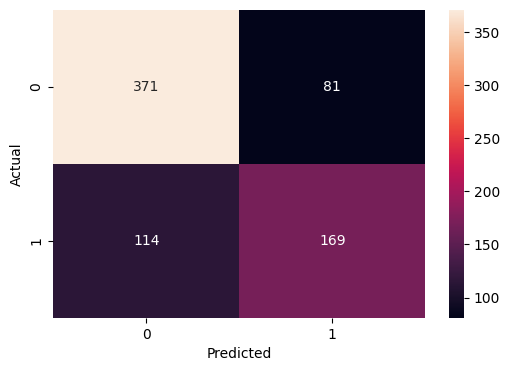

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       452
           1       0.68      0.60      0.63       283

    accuracy                           0.73       735
   macro avg       0.72      0.71      0.71       735
weighted avg       0.73      0.73      0.73       735

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       452
           1       0.68      0.60      0.63       283

    accuracy                           0.73       735
   macro avg       0.72      0.71      0.71       735
weighted avg       0.73      0.73      0.73       735



In [ ]:
conf_mat = confusion_matrix(y_test_HGradient, y_pred)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_HGradient, y_pred))
print(classification_report(y_test_HGradient, y_pred))

### Validación cruzada

In [ ]:
# Definimos el modelo a utilizar
model_HGradient = HistGradientBoostingClassifier()

# Definimos el espacio de búsqueda de hiperparámetros
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7],
              'max_iter': [100, 500, 1000],
              'l2_regularization': [0.1, 0.01, 0.001]}

# Realizamos la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(model_HGradient, param_grid, cv=5)
grid_search.fit(X_train_HGradient, y_train_HGradient)

# Imprimimos los mejores hiperparámetros y su rendimiento
print("Mejores hiperparámetros: ", grid_search.best_params_)
print("Rendimiento: ", grid_search.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Mejores hiperparámetros:  {'l2_regularization': 0.001, 'learning_rate': 0.01, 'max_depth': 5, 'max_iter': 1000}
Rendimiento:  0.6976190476190477


In [ ]:
# Evaluación del modelo
y_pred = grid_search.predict(X_test_HGradient)
accuracy = accuracy_score(y_test_HGradient, y_pred)
print(f"Precisión: {accuracy}")

Precisión: 0.7496598639455783


###probabilidades sobre mejor metodo

In [ ]:
probabilidades=grid_search.predict_proba(X_test_HGradient)

In [ ]:

prob = probabilidades[:,0]*100
prob=[math.trunc(_) for _ in prob]
rangos = range(0, 100 + 2,10)
frecuencias, bordes = np.histogram(prob, bins=rangos)
rel_freq=[np.round(_/np.sum(frecuencias)*100,2) for _ in frecuencias]
# creamos la figura

[2.18, 5.71, 6.67, 9.52, 11.43, 11.97, 13.06, 10.61, 10.2, 18.64]

In [ ]:
tabla_freq=pd.DataFrame(data=[rangos,rel_freq])
tabla_freq=tabla_freq.T
tabla_freq.columns=['rangos','frecuencias %']
tabla_freq

rangos  frecuencias %
0      0.0           2.18
1     10.0           5.71
2     20.0           6.67
3     30.0           9.52
4     40.0          11.43
5     50.0          11.97
6     60.0          13.06
7     70.0          10.61
8     80.0          10.20
9     90.0          18.64
10   100.0            NaN

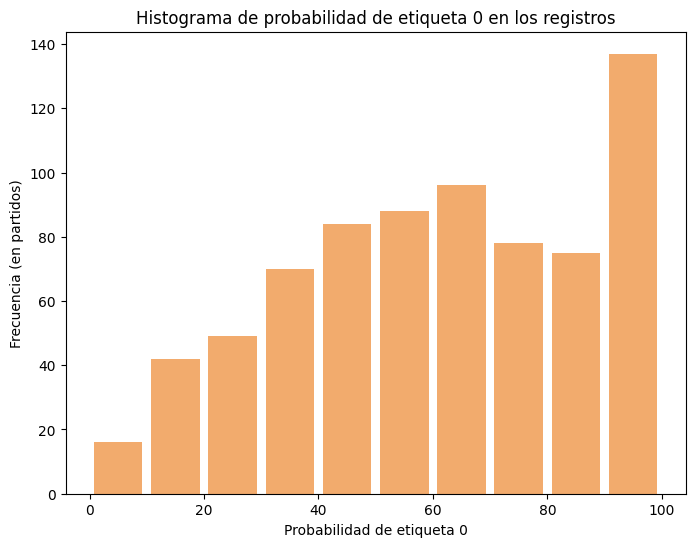

In [ ]:

plt.figure(figsize=(8, 6))
plot.hist(x=prob, color='#F2AB6D', rwidth=0.85, bins=rangos , )

# configuramos
plot.xlabel('Probabilidad de etiqueta 0')
plot.ylabel('Frecuencia (en partidos)')
plot.title('Histograma de probabilidad de etiqueta 0 en los registros')

# dibujamos
plot.show()

# Reducción de dimensionalidad

## PCA

Dado que el resultado obtenido para esta variable no es el esperado (Accurracy > 0.80) se decide realizar una reducción de dimensionalidad para el dataset  a través de un PCA.

La normalización asegura que todas las variables tengan la misma importancia en el análisis y que el resultado sea interpretable y coherente.

In [ ]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(df)
Nombres = df.columns
X_Norm = pd.DataFrame(X_Norm, columns = Nombres)

In [ ]:
Num_Componentes = X_Norm.shape[1]

pca = PCA(iterated_power='auto', n_components = Num_Componentes, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

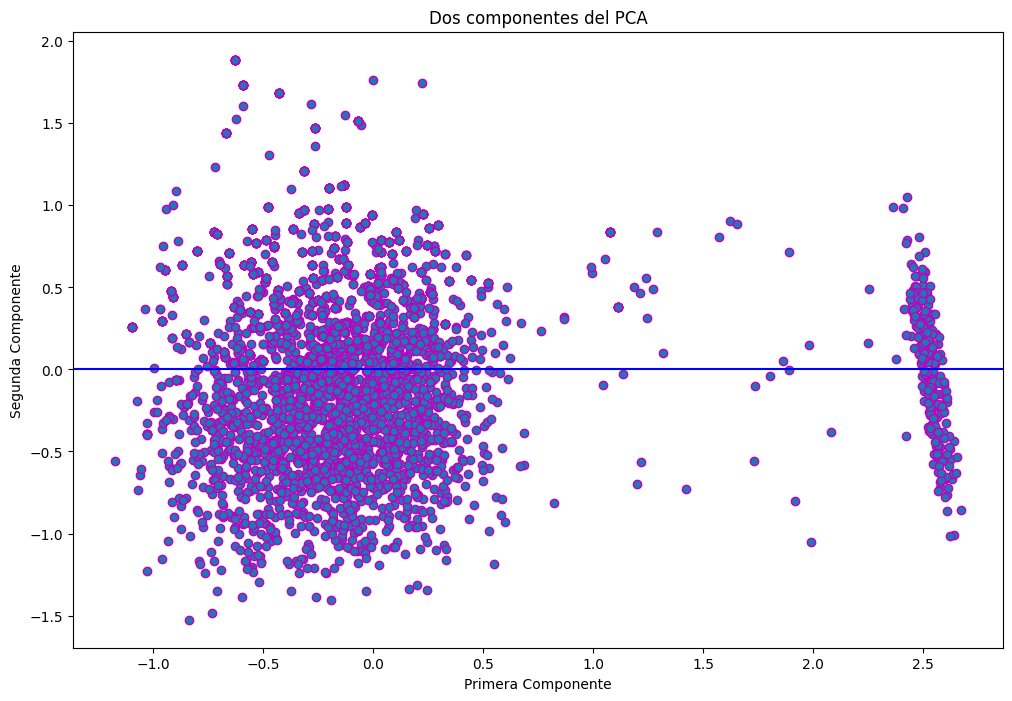

In [ ]:
Variables_Principales = pca.fit_transform(X_Norm)

fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales[:,0], Variables_Principales[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del PCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

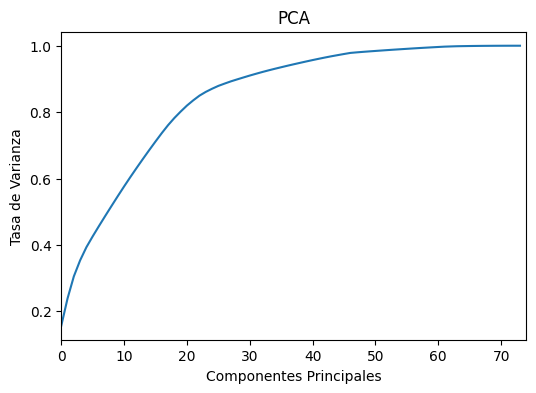

In [ ]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales

fig = plt.figure(figsize=(6,4))
plt.plot(np.cumsum(Varianza))
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(Varianza))
plt.show()


In [ ]:
Importancia_Componentes = pd.DataFrame(Varianza)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:11].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes.loc[:,0:21].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 30 componentes: ", format(100*Importancia_Componentes.loc[:,0:31].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes.loc[:,0:41].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 50 componentes: ", format(100*Importancia_Componentes.loc[:,0:51].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 60 componentes: ", format(100*Importancia_Componentes.loc[:,0:61].sum(axis = 1).values))


Porcentaje de Varianza detectada para las primeras 10 componentes:  [60.45126483]
Porcentaje de Varianza detectada para las primeras 20 componentes:  [83.54585603]
Porcentaje de Varianza detectada para las primeras 30 componentes:  [91.5588268]
Porcentaje de Varianza detectada para las primeras 40 componentes:  [96.07608236]
Porcentaje de Varianza detectada para las primeras 50 componentes:  [98.56151092]
Porcentaje de Varianza detectada para las primeras 60 componentes:  [99.72335175]


In [ ]:
Componentes_Seleccionadas = 30 

Tasa_Varianza_Explicada = np.sum(Varianza[0:Componentes_Seleccionadas])
Nuevas_Componentes = PCA(Tasa_Varianza_Explicada, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

X_Norm_PCA = Nuevas_Componentes.fit_transform(X_Norm) 

print('Tamaño de los datos originales con MinMax: ', X_Norm.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', X_Norm_PCA.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada*100))

Tamaño de los datos originales con MinMax:  (3675, 74)
Tamaño de los datos reducidos:  (3675, 31)
Porcentaje de la varianza explicada con las componentes seleccionadas: 90.44%


Reducimos con mejores parametros

In [ ]:
X_trainPCA, X_testPCA, y_trainPCA, y_testPCA = train_test_split(
                                        X_Norm_PCA,
                                        Y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

### GFradient Boosting (PCA)

In [ ]:
X_train_GFradient = X_trainPCA.copy()
y_train_GFradient = y_trainPCA.copy()
X_test_GFradient =X_testPCA.copy() 
y_test_GFradient = y_testPCA.copy()

In [ ]:
# Definición de hiperparámetros
params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 3
}

# Entrenamiento del modelo
model = GradientBoostingClassifier(**params)
model.fit(X_train_GFradient, y_train_GFradient)

# Evaluación del modelo
y_pred = model.predict(X_test_GFradient)
accuracy = accuracy_score(y_test_GFradient, y_pred)
print(f"Precisión: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión: 0.7142857142857143


### Matriz de confusión

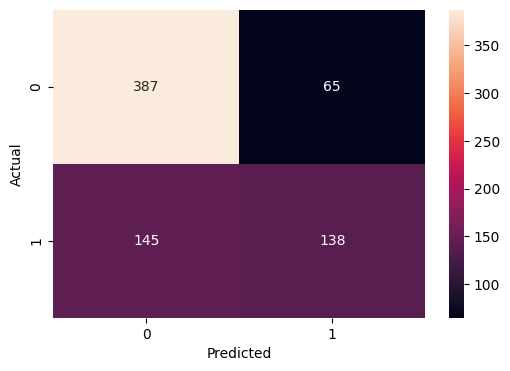

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       452
           1       0.68      0.49      0.57       283

    accuracy                           0.71       735
   macro avg       0.70      0.67      0.68       735
weighted avg       0.71      0.71      0.70       735

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       452
           1       0.68      0.49      0.57       283

    accuracy                           0.71       735
   macro avg       0.70      0.67      0.68       735
weighted avg       0.71      0.71      0.70       735



In [ ]:
conf_mat = confusion_matrix(y_test_GFradient, y_pred)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_GFradient, y_pred))
print(classification_report(y_test_GFradient, y_pred))

### Validación cruzada

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = GradientBoostingClassifier(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_GFradient, y_train_GFradient)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Evaluación del modelo
y_pred = grid.predict(X_test_GFradient)
accuracy = accuracy_score(y_test_GFradient, y_pred)
print(f"Precisión: {accuracy}")

Precisión: 0.7414965986394558


## Kernel PCA

Normalizamos los datos para iniciar con la reduccion de dimensionalidad a través del kernel pca - volver a empezar

In [ ]:
X_Norm_para_Kernel=X

In [ ]:
#kpca = KernelPCA(n_components = 45, kernel = 'linear', fit_inverse_transform = True, gamma = 0.1)
kpca = KernelPCA(n_components = 45, kernel = 'rbf', fit_inverse_transform = True, gamma = 0.1)

Variables_Principales_Kernel = kpca.fit_transform(X_Norm_para_Kernel)

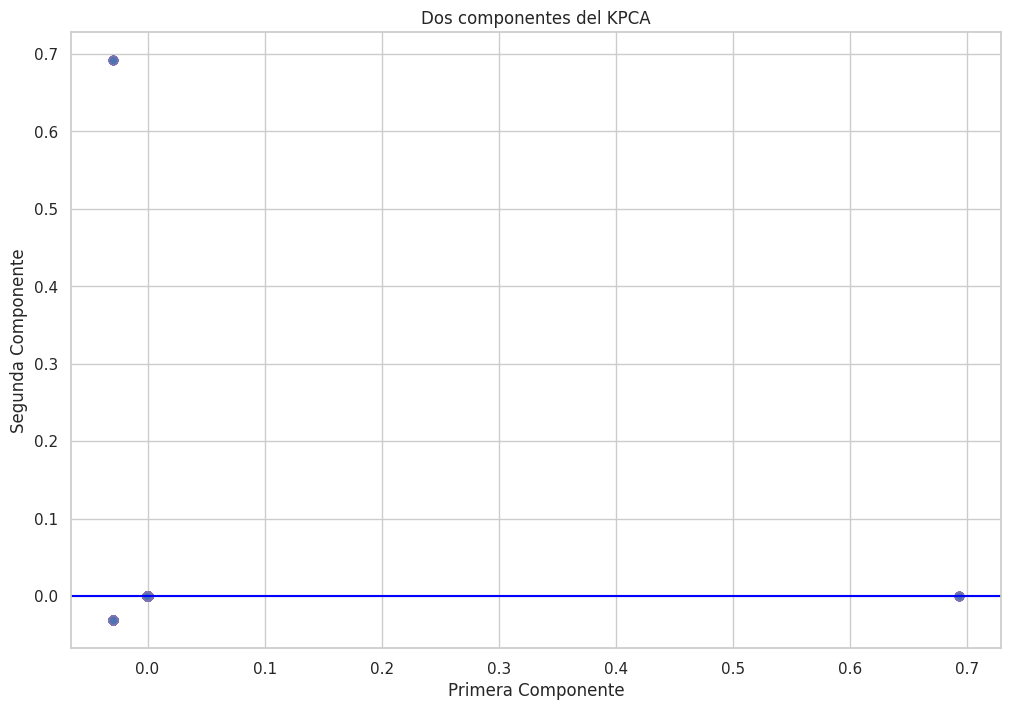

In [ ]:
fig = plt.figure(figsize=(12,8)) # Se define el tamaño de la figura en ancho y altura

plt.scatter(Variables_Principales_Kernel[:,0], Variables_Principales_Kernel[:,1], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Dos componentes del KPCA') # Titulo de la gráfica
plt.xlabel('Primera Componente') # Etiqueta del eje x
plt.ylabel('Segunda Componente') # Etiqueta del eje y
plt.show() # Mostrar figura

In [ ]:
X_Norm_para_Kernel.shape[1]

74

Valores propios del método kernel:  [8.00347592 8.00000174 8.00000001 8.         8.         8.
 8.         8.         8.         8.         8.         8.
 8.         8.         8.         8.         8.         8.
 8.         8.         8.         8.         8.         8.
 8.         8.         8.         8.         8.         8.
 8.         8.         8.         8.         8.         8.
 8.         8.         8.         8.         8.         8.
 8.         8.         8.        ]


(0.0, 45.0)

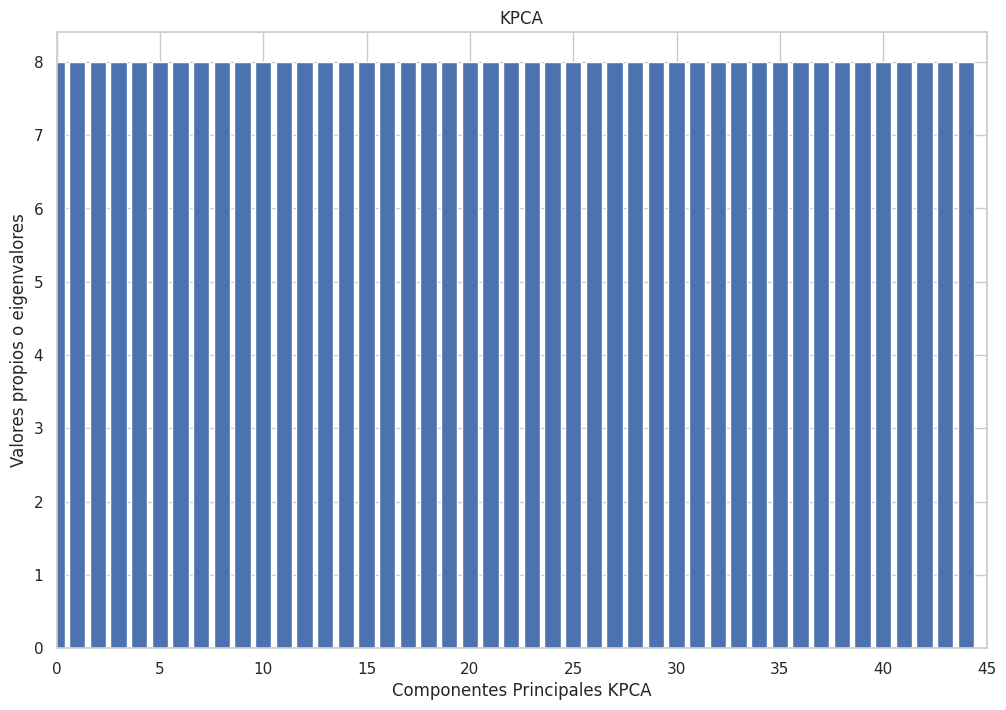

In [ ]:
lambdas_kpca = kpca.eigenvalues_ # Calculamos los eigenvalores o valores propios de la matriz kernel centrado en orden decreciente.
print("Valores propios del método kernel: ", lambdas_kpca)

fig = plt.figure(figsize=(12,8))
plt.bar(np.arange(len(lambdas_kpca)), lambdas_kpca)
plt.xlabel('Componentes Principales KPCA')
plt.ylabel('Valores propios o eigenvalores')
plt.title('KPCA')
plt.xlim(0, len(lambdas_kpca))

In [ ]:
minimo=[]
for _ in range(1,int(X_Norm_para_Kernel.shape[1])):  
   NUM_Componentes = _
   kpca_main = KernelPCA(n_components = NUM_Componentes, kernel = 'rbf', fit_inverse_transform = True, gamma = 0.9)
   Datos_Kernel_RED = kpca_main.fit_transform(X_Norm_para_Kernel)
   # print('Tamaño de los datos originales con MinMax: ', X_Norm_para_Kernel.shape) # Tamaño de los datos originales
   # print('Tamaño de los datos reducidos con Kernel PCA: ', Datos_Kernel_RED.shape) # Tamaño de los datos reducidos con Kernel PCA
   Datos_inversa = kpca_main.inverse_transform(Datos_Kernel_RED) 

   X_Norm_para_Kernel_DF = pd.DataFrame(data = np.array(X_Norm_para_Kernel))
   Datos_inversa_DF = pd.DataFrame(data = np.array(Datos_inversa))
   Error = error_kernelpca(X_Norm_para_Kernel_DF, Datos_inversa_DF)

   #print('Error promedio: {:.5f}'.format(np.mean(Error)))
   minimo.append(np.mean(Error))


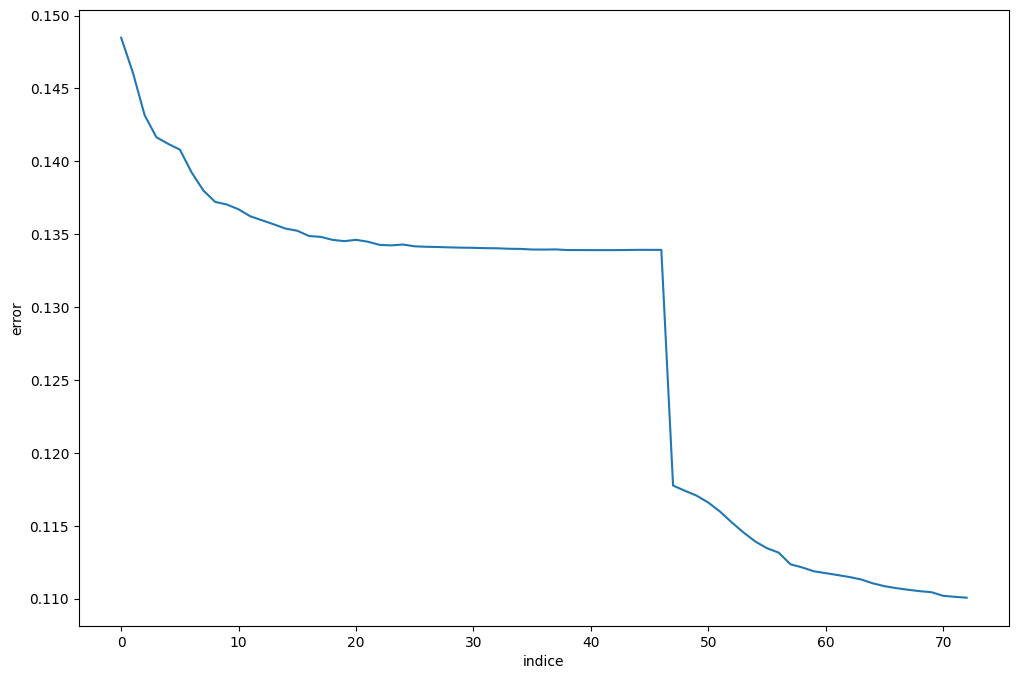

In [ ]:
indices = range(len(minimo))
fig = plt.figure(figsize=(12,8)) 
plt.plot( indices,minimo)

# Agregar etiquetas a los ejes
plt.xlabel('indice')
plt.ylabel('error')

# Mostrar la gráfica
plt.show()

Despues de ver la gráfica se concluye que no hay una reducción ideal 

### GFrafient Boosting (Kernel PCA)

In [ ]:
X_trainKernel, X_testKernel, y_trainKernel, y_testKernel = train_test_split(
                                        X_Norm_para_Kernel,
                                        Y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Definición de hiperparámetros
params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 3
}

# Entrenamiento del modelo
model = GradientBoostingClassifier(**params)
model.fit(X_trainKernel, y_trainKernel)

# Evaluación del modelo
y_pred = model.predict(X_testKernel)
accuracy = accuracy_score(y_testKernel, y_pred)
print(f"Precisión: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión: 0.7260458839406208


### Matriz de confusión

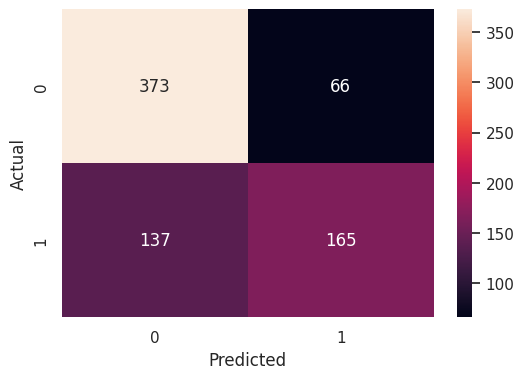

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       439
           1       0.71      0.55      0.62       302

    accuracy                           0.73       741
   macro avg       0.72      0.70      0.70       741
weighted avg       0.72      0.73      0.72       741

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       439
           1       0.71      0.55      0.62       302

    accuracy                           0.73       741
   macro avg       0.72      0.70      0.70       741
weighted avg       0.72      0.73      0.72       741



In [ ]:
conf_mat = confusion_matrix(y_testKernel, y_pred)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y['Goles_Local'].sort_values().unique() # Y.sort_values(by='Goles_Local').unique()
            , yticklabels=Y['Goles_Local'].sort_values().unique() # Y.sort_values(by='Goles_Local').unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_testKernel, y_pred))
print(classification_report(y_testKernel, y_pred))

### grid

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = GradientBoostingClassifier(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_trainKernel, y_trainKernel)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Evaluación del modelo
y_pred = grid.predict(X_testKernel)
accuracy = accuracy_score(y_testKernel, y_pred)
print(f"Precisión: {accuracy}")

NameError: ignored

##Análisis de Componentes Independientes (ICA)

In [ ]:
X_Norm_ICA=X_Norm_para_Kernel

In [ ]:
componentes = np.arange(2,X_Norm_ICA.shape[1],1)
Error_ICA = []

for _,n in enumerate(componentes):
  Modelo_ICA = FastICA(n_components = n, fun = 'logcosh', fun_args = {'alpha': 1},max_iter = 1000) #funcion por defecto que se usa
  data_espectros_mW_reducido = Modelo_ICA.fit_transform(X_Norm_ICA)
  datos_reconstruidos = Modelo_ICA.inverse_transform(data_espectros_mW_reducido)
  X_PCA = pd.DataFrame(data = np.array(X_Norm_ICA))
  Datos_inversa_PCA = pd.DataFrame(data = np.array(datos_reconstruidos))
  Error = error_ica(X_PCA, Datos_inversa_PCA)
  Error_ICA.append(Error.sum()/Datos_inversa_PCA.shape[0])

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(2, 2 + len(np.asarray(Error_ICA))), Error_ICA)
plt.xlabel('Componentes Principales')
plt.ylabel('Error ICA')
plt.title('RMSE ICA')
plt.xlim(1, 2 + len(Error_ICA))
plt.show()

In [ ]:
pos = np.where(np.asarray(Error_ICA) < 0.015) # 0.015 es un umbral de decisión
n_optimo_componentes = np.array(pos) + 2
Errores = pd.DataFrame(Error_ICA).loc[pos]
Tabla = np.vstack([n_optimo_componentes, Errores.values.T]).T
Tabla = pd.DataFrame(Tabla, columns = ["Componentes", "Error ICA"])
display(Tabla)

In [ ]:
Modelo_ICA = FastICA(n_components = 2, fun = 'logcosh', fun_args = {'alpha': 1},max_iter = 1000)
data_espectros_Ica_reducido = Modelo_ICA.fit_transform(X_Norm_ICA)
print("Tamaño de los Datos Originales = ", X_Norm_ICA.shape)
print("Tamaño de los Datos Reducidos = ", data_espectros_Ica_reducido.shape)

### GFradient Boosting (ICA)

In [ ]:
X_trainICA, X_testICA, y_trainICA, y_testICA = train_test_split(
                                        X_Norm_ICA,
                                        Y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Definición de hiperparámetros
params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 3
}

# Entrenamiento del modelo
model = GradientBoostingClassifier(**params)
model.fit(X_trainICA, y_trainICA)

# Evaluación del modelo
y_pred = model.predict(X_testICA)
accuracy = accuracy_score(y_testICA, y_pred)
print(f"Precisión: {accuracy}")

### Matriz de confusión

In [ ]:
conf_mat = confusion_matrix(y_testICA, y_pred)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_testICA, y_pred))
print(classification_report(y_testICA, y_pred))

### Validación Cruzada

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = GradientBoostingClassifier(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_trainICA, y_trainICA)

In [ ]:
# Evaluación del modelo
y_pred = grid.predict(X_testICA)
accuracy = accuracy_score(y_testICA, y_pred)
print(f"Precisión: {accuracy}")

## T -SNE

In [ ]:
Y = pd.DataFrame(dfy_goles_local)

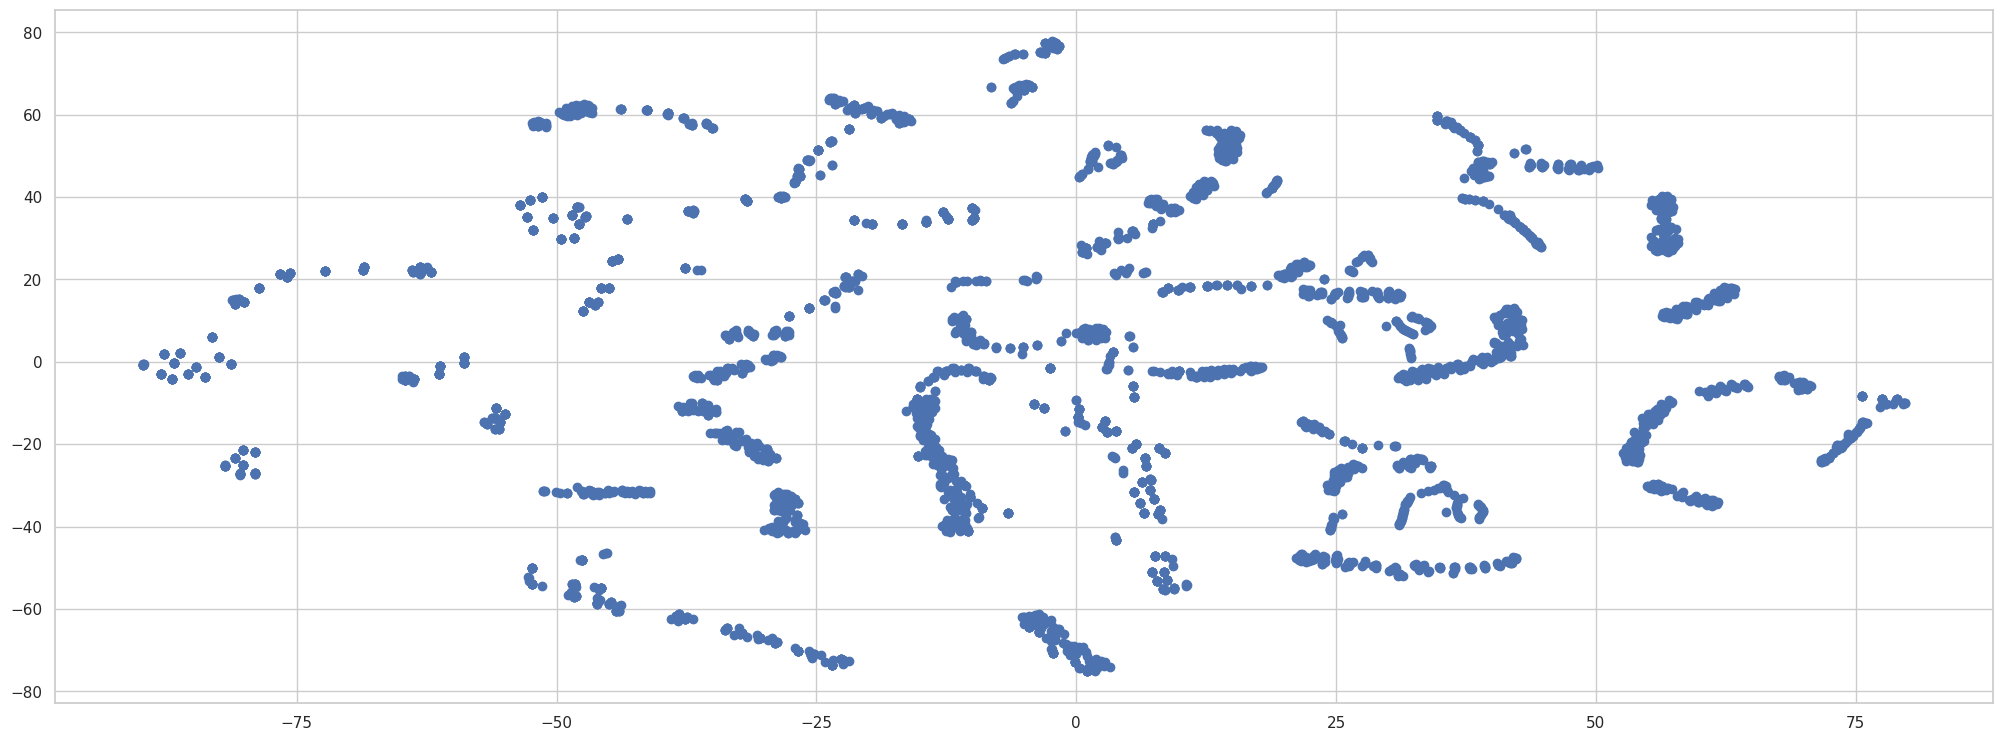

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [ ]:
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(
                                        X_tsne,
                                        Y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

### GFrafient Boosting

In [ ]:
# Definición de hiperparámetros
params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 3
}

# Entrenamiento del modelo
model = GradientBoostingClassifier(**params)
model.fit(X_train_tsne, y_train_tsne)

# Evaluación del modelo
y_pred = model.predict(X_test_tsne)
accuracy = accuracy_score(y_test_tsne, y_pred)
print(f"Precisión: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión: 0.6234817813765182


### Matriz de confusión

TypeError: ignored

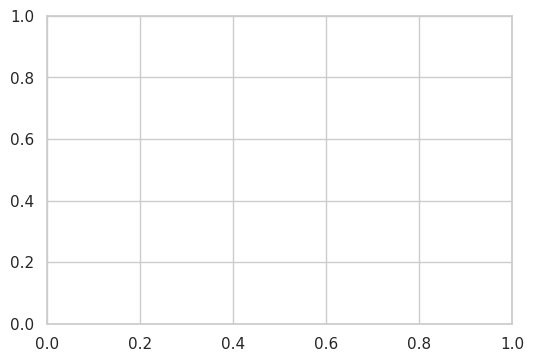

In [ ]:
conf_mat = confusion_matrix(y_test_tsne, y_pred)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat
            , annot=True
            , fmt='d'
            , xticklabels=Y.sort_values().unique()
            , yticklabels=Y.sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test_tsne, y_pred))
print(classification_report(y_test_tsne, y_pred))

### Validación cruzada

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = GradientBoostingClassifier(),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_tsne, y_train_tsne)

In [ ]:
# Evaluación del modelo
y_pred = grid.predict(X_test_tsne)
accuracy = accuracy_score(y_test_tsne, y_pred)
print(f"Precisión: {accuracy}")

#Proyeccion Aleatoria

Se normalizan los datos y luego se reducen, para evaluar que tanta informacion se pierde o no, se genear un modelo de regresion con los datos originales y otro con los datos reducidos y se compara el aerror

In [ ]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(df)
Nombres = df.columns
X_Norm = pd.DataFrame(X_Norm, columns = Nombres)
X_Norm_proyeccion_aleatoria=X_Norm

In [ ]:
X=X_Norm_proyeccion_aleatoria
y=dfy_goles_local

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# definir la dimensionalidad deseada del conjunto de datos reducido
n_components = 40

# crear un objeto de proyección aleatoria
rp = GaussianRandomProjection(n_components=n_components)

# proyectar los datos originales sobre la matriz de proyección aleatoria
X_reduced = rp.fit_transform(X)


Divido los datos reducidos en entrenamiento y test

In [ ]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


entreno con una regresion los datos originales

In [ ]:
lr_orig = LogisticRegression()
lr_orig.fit(X_train, y_train)
y_pred_orig = lr_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

entreno con una regresion los datos reducidos

In [ ]:
lr_reduced = LogisticRegression()
lr_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = lr_reduced.predict(X_test_reduced)
acc_reduced = accuracy_score(y_test_reduced, y_pred_reduced)

Comparo

In [ ]:
print("Precisión utilizando datos originales: {:.2f}".format(acc_orig))
print("Precisión utilizando datos reducidos: {:.2f}".format(acc_reduced))

genero gráfico

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.hist(rp.components_.flatten(), bins = 'fd')
plt.title('Histograma de la matriz de transformación GNP')
plt.ylabel("Componentes")
plt.show()

In [ ]:
Modelo.predict_proba(X_test)